In [1]:
# This is used to increase the notebook's width to fill the screen, allowing for better plot visualization
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
import cv2
import time
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from utils import plot
from utils import split

C:\Users\leoar\AppData\Local\Temp\ipykernel_3556\659568940.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# integrative CT Images and Clinical Features for COVID19 (iCTCF) Dataset

From the accumulated data in our hospitals, we prepare two cohorts that in total include 1170 and 351 laboratory-confirmed, COVID-19-negative/control and suspected patients, and collect their corresponding chest computed tomography (CT) images, clinical features (CFs) and SARS-CoV-2 laboratory testing results if available. 

Then, we develop a patient-centric resource named integrative CT images and CFs for COVID-19 (iCTCF) to archive chest CT images, 130 types of CFs and laboratory-confirmed SARS-CoV-2 clinical status from 1521 patients with or without COVID-19 pneumonia, reaching a data volume of 265.1 GB.

Using the Cohort 1, we integrate the highly heterogeneous CT and CF datasets, and build a novel framework of Hybrid-learning for UnbiaSed predicTion of COVID-19 patients (HUST-19) to predict the clinical outcomes. For morbidity outcomes, the area under the curve (AUC) values of HUST-19 are 0.978, 0.921 and 0.931 for predicting negative cases (Control), mild/regular (Type I) and severe/critically ill (Type II) patients, respectively. 

We also use the Cohort 2 as an independent dataset to evaluate HUST-19, which consistently produces a promising accuracy. For mortality outcomes, we merge the two cohorts and achieve an AUC value of 0.856 for predicting deceased cases. 

Using HUST-19, we conducted a retrospective analysis of 299 suspected cases in the Cohort 1, and predict 207 and 71 potential Type I and II patients. 

Our predictions are highly consistent with following RT-PCR validations. In conclusion, this medical resource can be a fundamental resource not only for the purpose of retrospective analysis, but also provide a useful tool for improving diagnosis and treatment of COVID-19 patients. 

Together with HUST-19, iCTCF will be continuously maintained and updated, meanwhile all source data sets including chest CT images, CFs and laboratory confirmations are available for academic research. All data sets in iCTCF are made available under a CC BY-NC 4.0 license.

## [Source](https://ngdc.cncb.ac.cn/ictcf/)

# Path to Dataset

In [2]:
# Relative path to dataset
data_dir = os.path.join( "..", "..", "..", "..", "Datasets", "COVID19", "Tomografia", "COVIDx CT-3A" )
assert os.path.exists( data_dir ), "Unable to find the relative path to COVIDx CT-3A, please check data_dir..."

#
dataset_name = "iCTCF"

## Samples Dataframe

In [3]:
# Path to metadata csv
csv_path = os.path.join( data_dir, "combined_metadata.csv" )

# Reads metadata as dataframe, "age" column is treated as str since "N/A" can't be int
samples_df = pd.read_csv(csv_path, sep = ";", na_filter = False, dtype={"age": str})

samples_df.head()

,filename,patient_id,source,class,country,sex,age,partition,slice_selection,x_min,y_min,x_max,y_max,verified_finding,view,modality
0,NCP_96_1328_0032.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,9,94,512,405,Yes,Axial,CT
1,NCP_96_1328_0035.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,106,512,405,Yes,Axial,CT
2,NCP_96_1328_0036.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,105,512,406,Yes,Axial,CT
3,NCP_96_1328_0037.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,104,512,406,Yes,Axial,CT
4,NCP_96_1328_0038.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,103,512,406,Yes,Axial,CT


## Patients Dataframe

In [4]:
# Creates a new dataframe with metadata sorted by patient
patient_df = plot.convert_df_sample2patient( samples_df )

patient_df.head()

,patient_id,source,class,country,sex,age,partition,slice_selection,verified_finding,view,modality,sample_count
0,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,Yes,Axial,CT,121
1,NCP_270,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,124
2,NCP_322,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,40
3,NCP_1276,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,32
4,NCP_2683,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,9


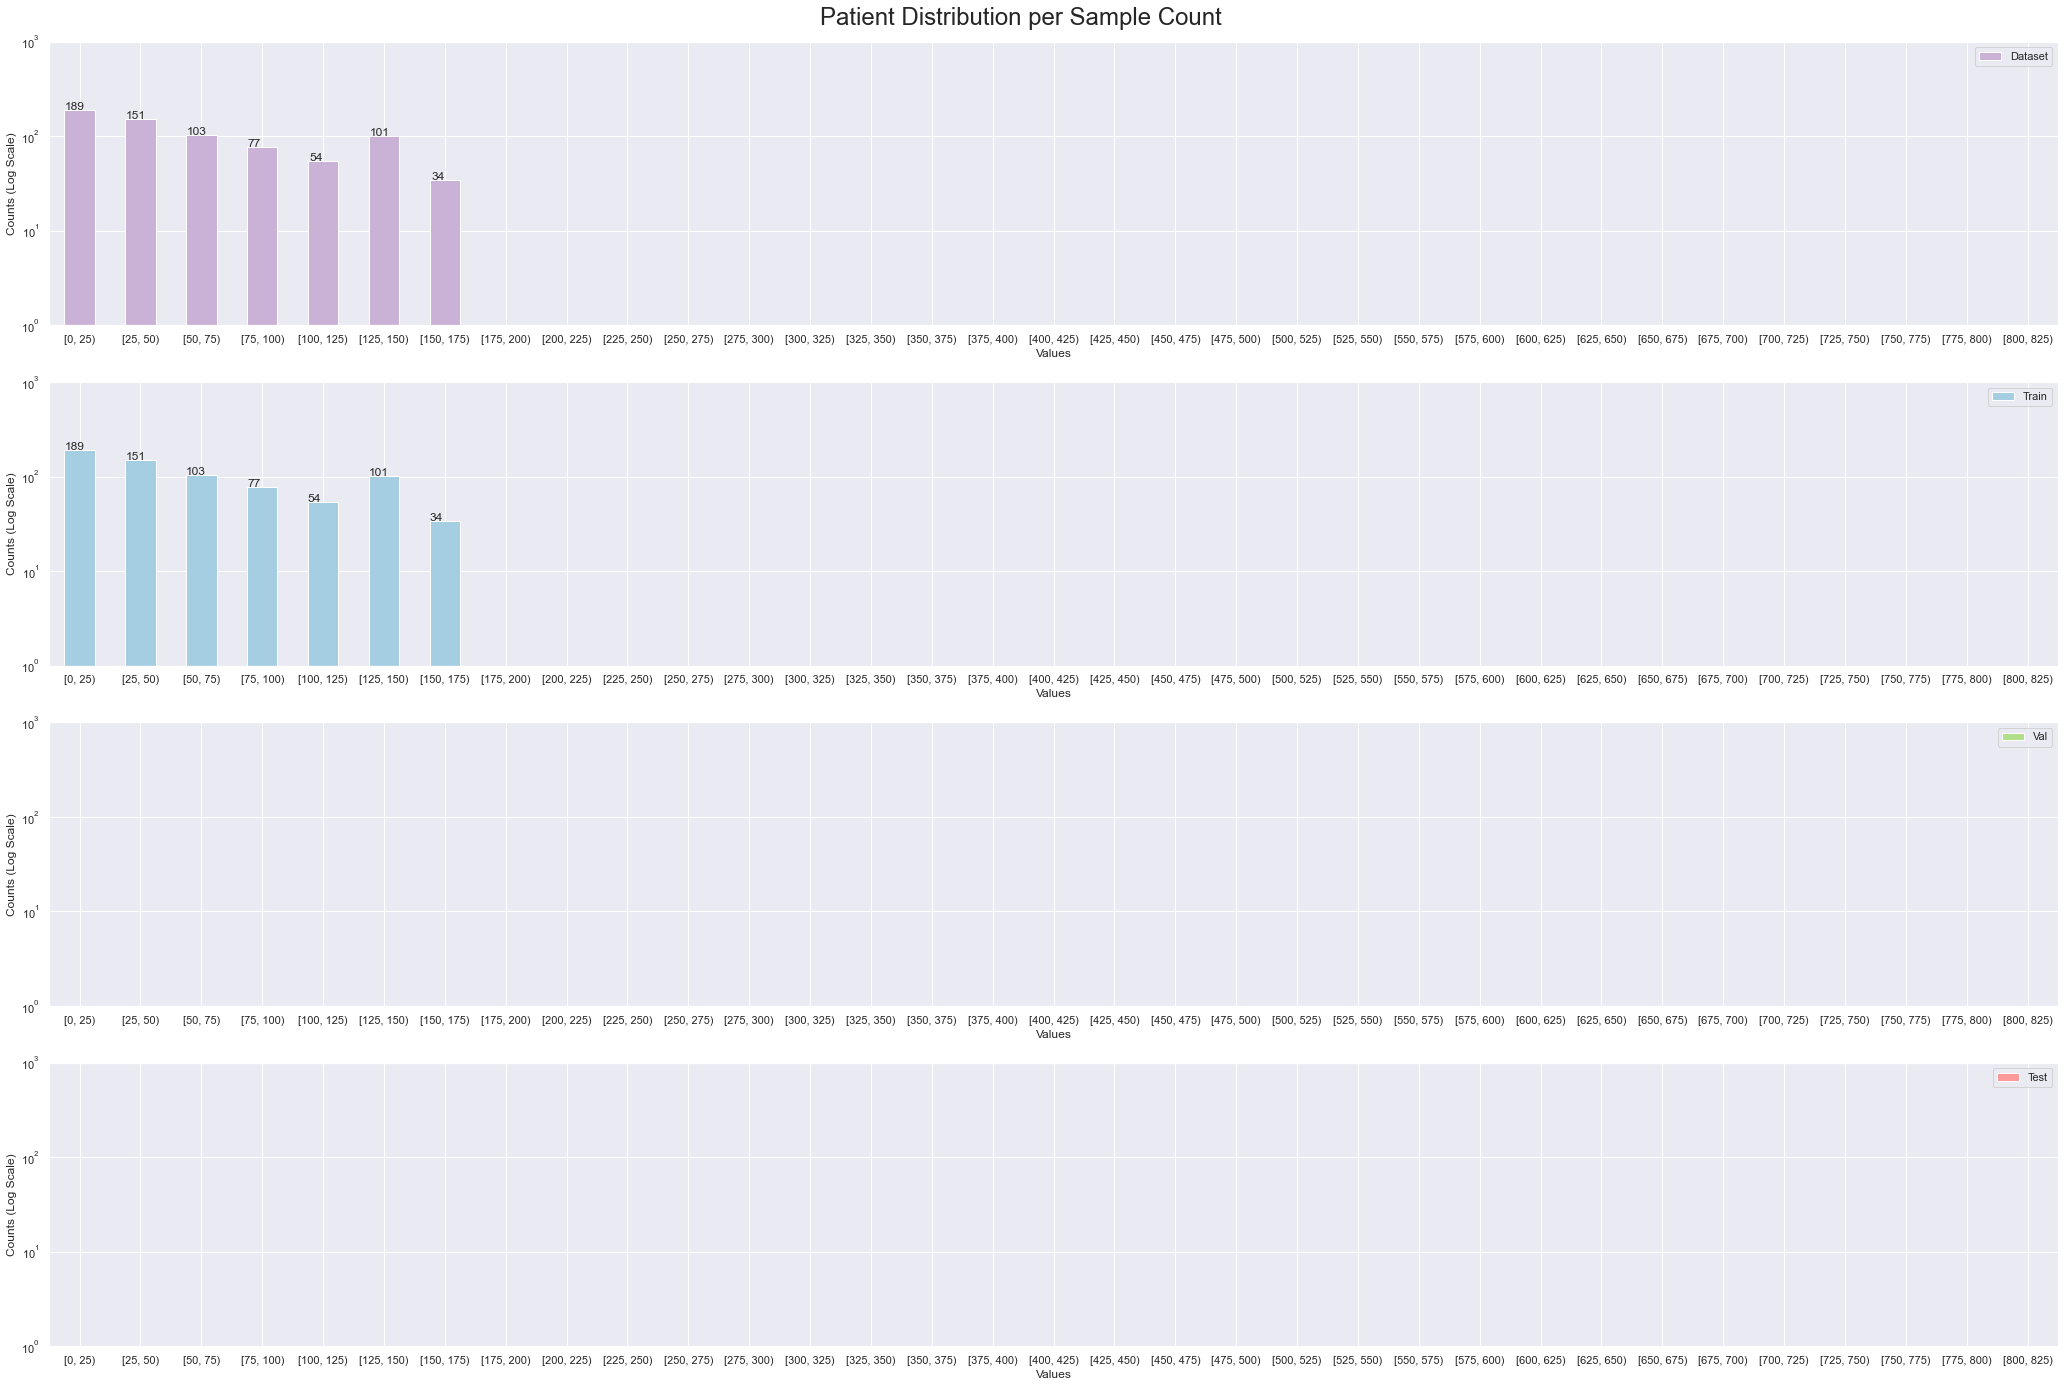

In [5]:
figure = plt.figure( figsize = (36, 24) )
plot.column_per_partition_as_histogram( patient_df, "sample_count", dataset_name, figure, title_complement = "Patient")

In [6]:
counts_df = plot.column_bins_per_partition_as_df( patient_df, "sample_count", dataset_name )
counts_df.head(len(counts_df))

,Dataset,Train,Val,Test
Values,,,,
"[0, 25)",189,189,0,0
"[25, 50)",151,151,0,0
"[50, 75)",103,103,0,0
"[75, 100)",77,77,0,0
"[100, 125)",54,54,0,0
"[125, 150)",101,101,0,0
"[150, 175)",34,34,0,0
"[175, 200)",0,0,0,0
"[200, 225)",0,0,0,0


# Plots

## Class

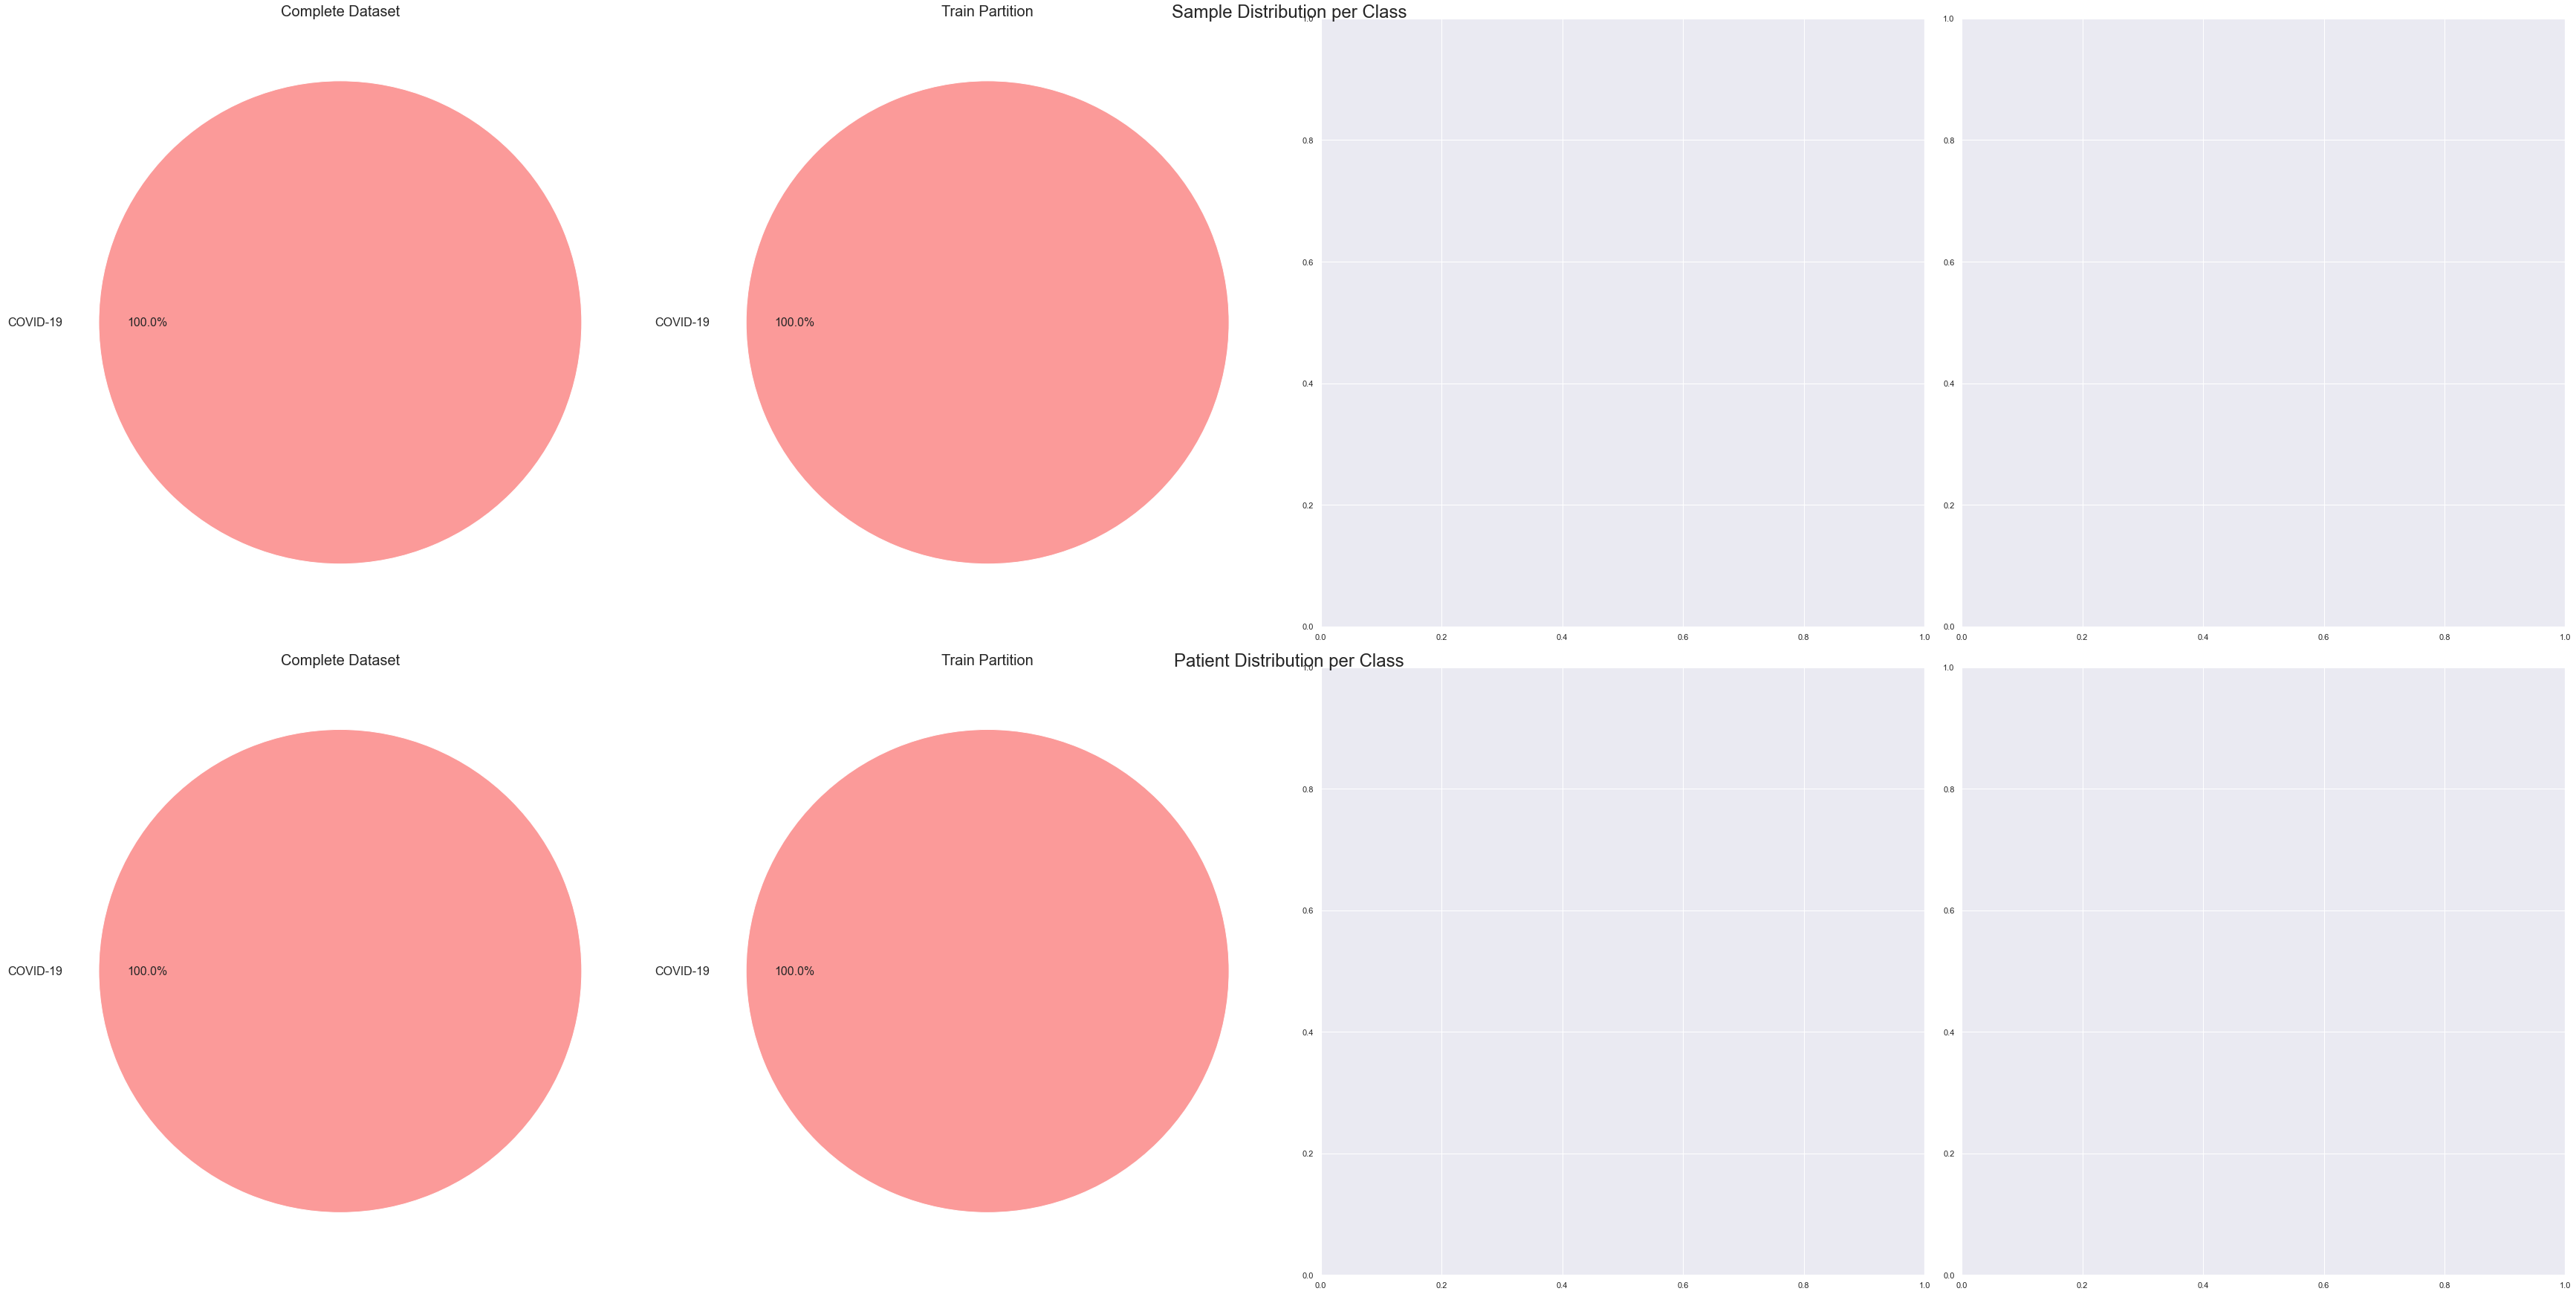

In [7]:
plot.column_as_pies( samples_df, patient_df, "class", dataset_name, figsize = (48, 24) )

In [8]:
plot.column_as_table( samples_df, patient_df, "class", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
COVID-19,45912,45912,0,0
Normal,0,0,0,0
Pneumonia,0,0,0,0
SUM,45912,45912,0,0
,Dataset,Train,Val,Test
Values,,,,
COVID-19,709,709,0,0
Pneumonia,0,0,0,0
Normal,0,0,0,0


## Age

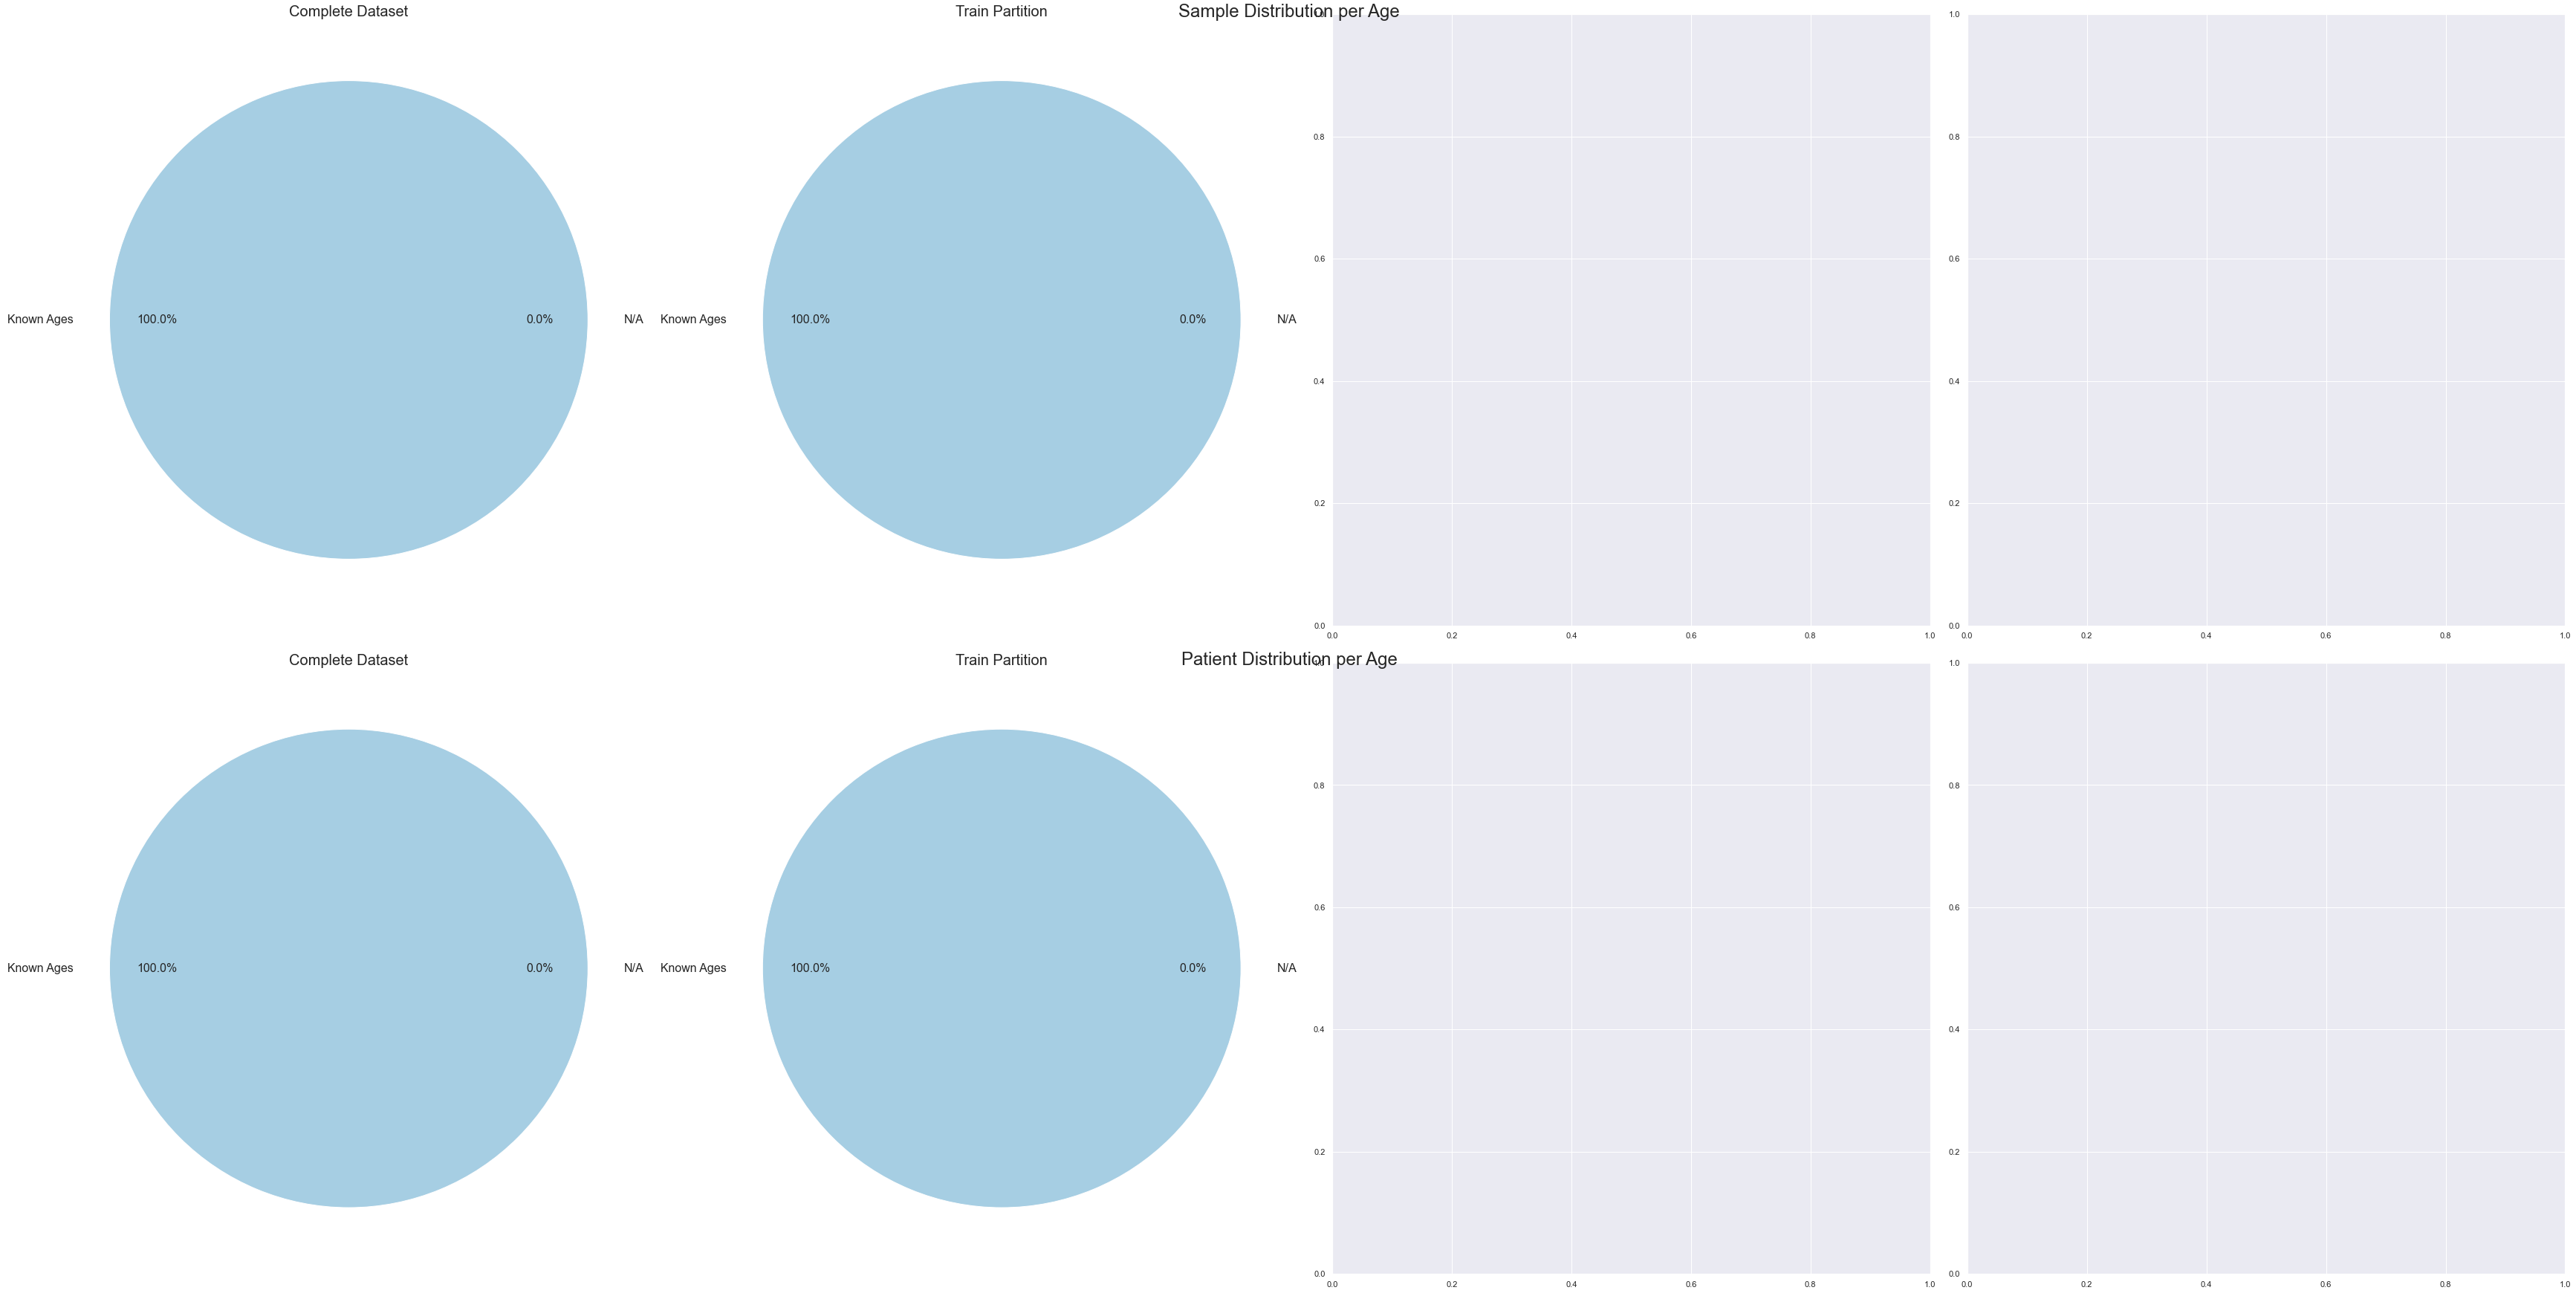

In [9]:
plot.column_as_pies( samples_df, patient_df, "age", dataset_name, figsize = (48, 24))

In [10]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
N/A,0,0,0,0
Known Ages,45912,45912,0,0
SUM,45912,45912,0,0
,Dataset,Train,Val,Test
Values,,,,
N/A,0,0,0,0
Known Ages,709,709,0,0
SUM,709,709,0,0


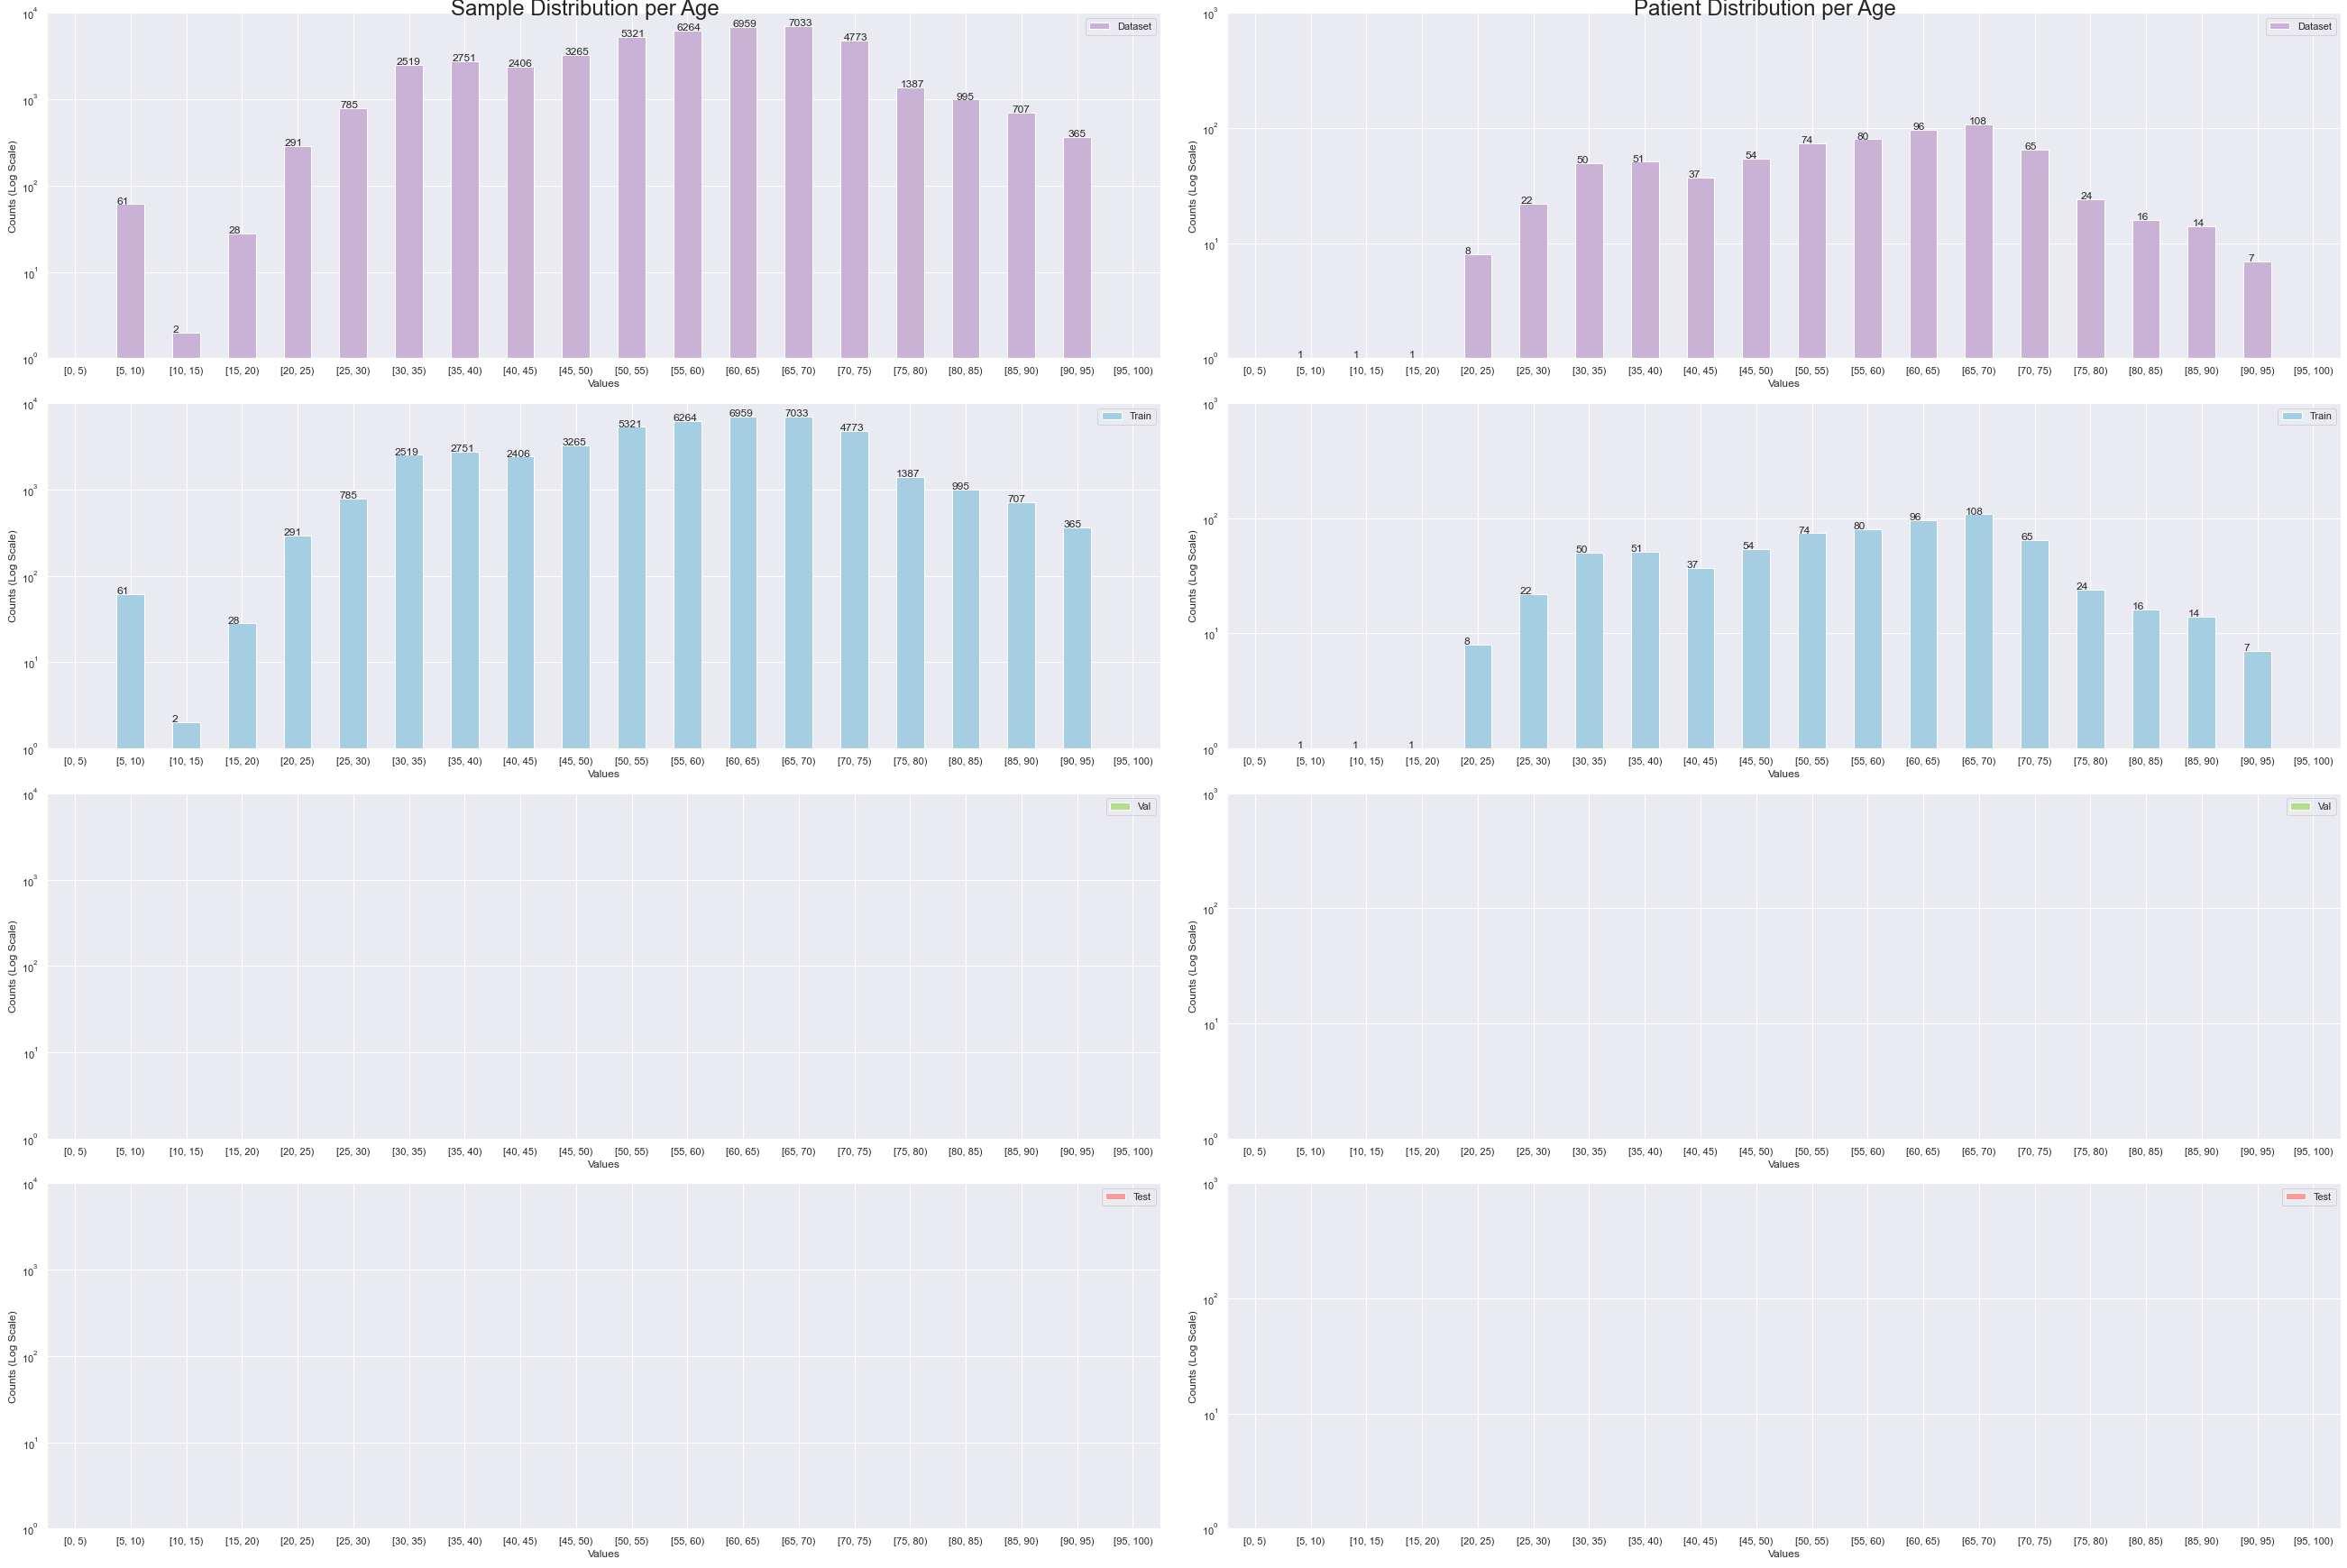

In [11]:
plot.column_as_histograms( samples_df, patient_df, "age", dataset_name, figsize = (36, 24))

In [12]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = True )

,Dataset,Train,Val,Test
Values,,,,
"[0, 5)",0,0,0,0
"[5, 10)",61,61,0,0
"[10, 15)",2,2,0,0
"[15, 20)",28,28,0,0
"[20, 25)",291,291,0,0
"[25, 30)",785,785,0,0
"[30, 35)",2519,2519,0,0
"[35, 40)",2751,2751,0,0
"[40, 45)",2406,2406,0,0


## Sex

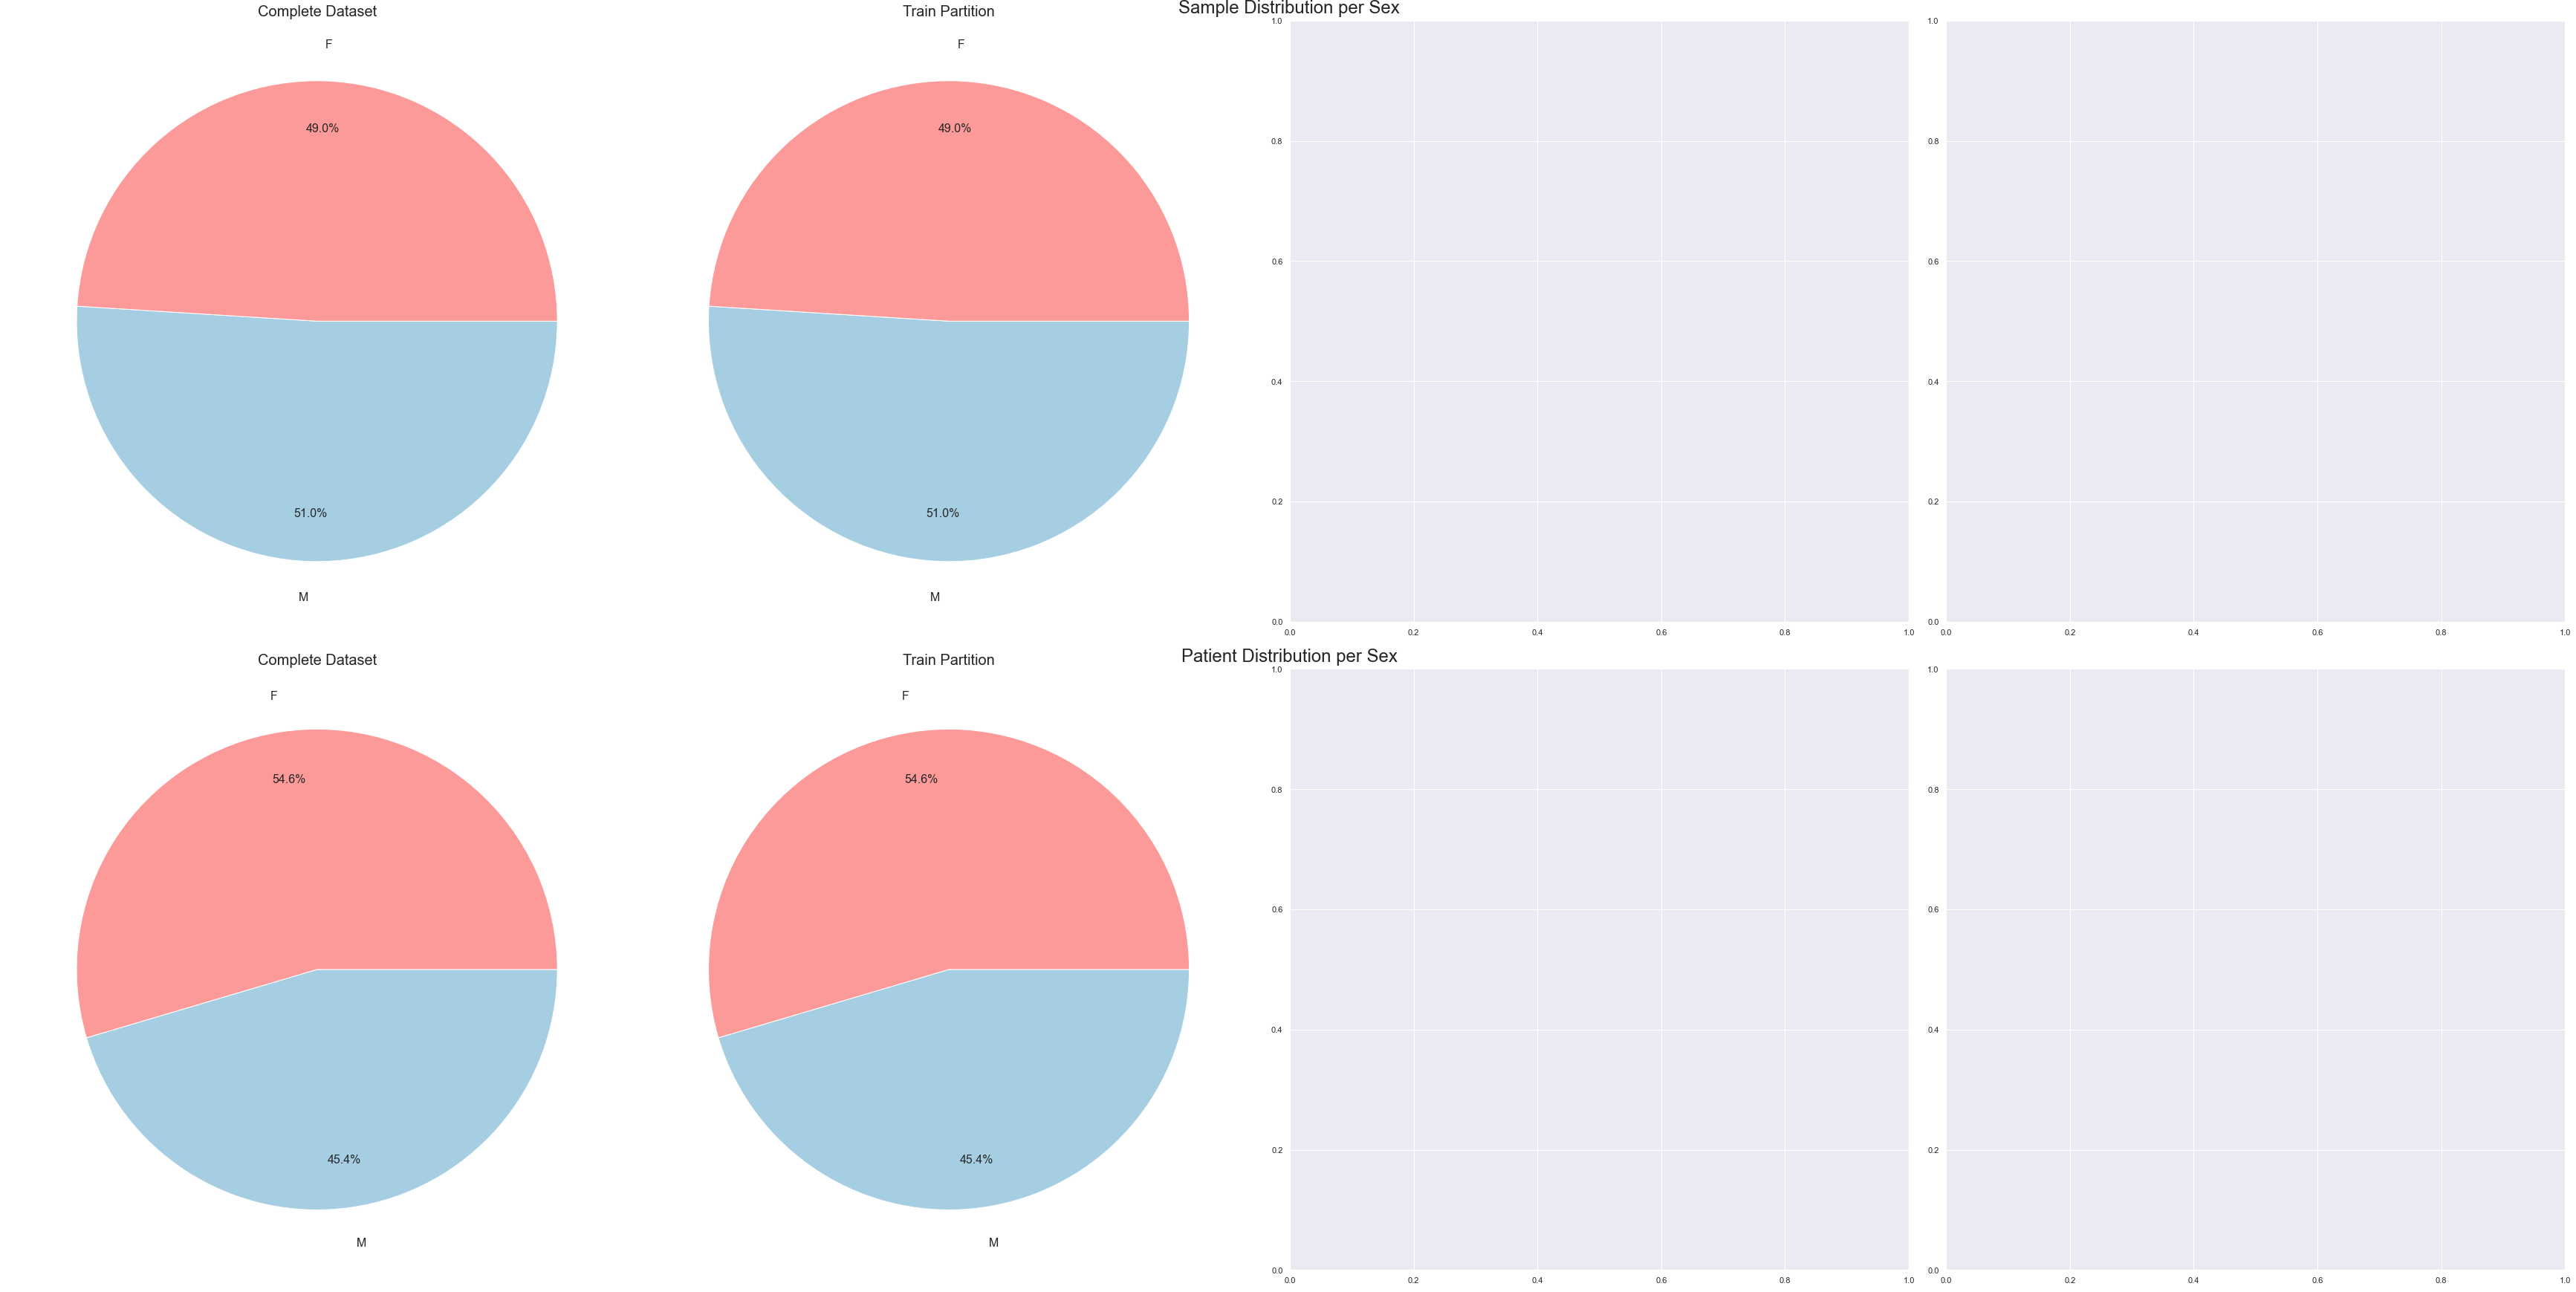

In [13]:
plot.column_as_pies( samples_df, patient_df, "sex", dataset_name, figsize = (48, 24) )

In [14]:
plot.column_as_table( samples_df, patient_df, "sex", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
M,23412,23412,0,0
N/A,0,0,0,0
F,22500,22500,0,0
SUM,45912,45912,0,0
,Dataset,Train,Val,Test
Values,,,,
N/A,0,0,0,0
M,322,322,0,0
F,387,387,0,0


## Country

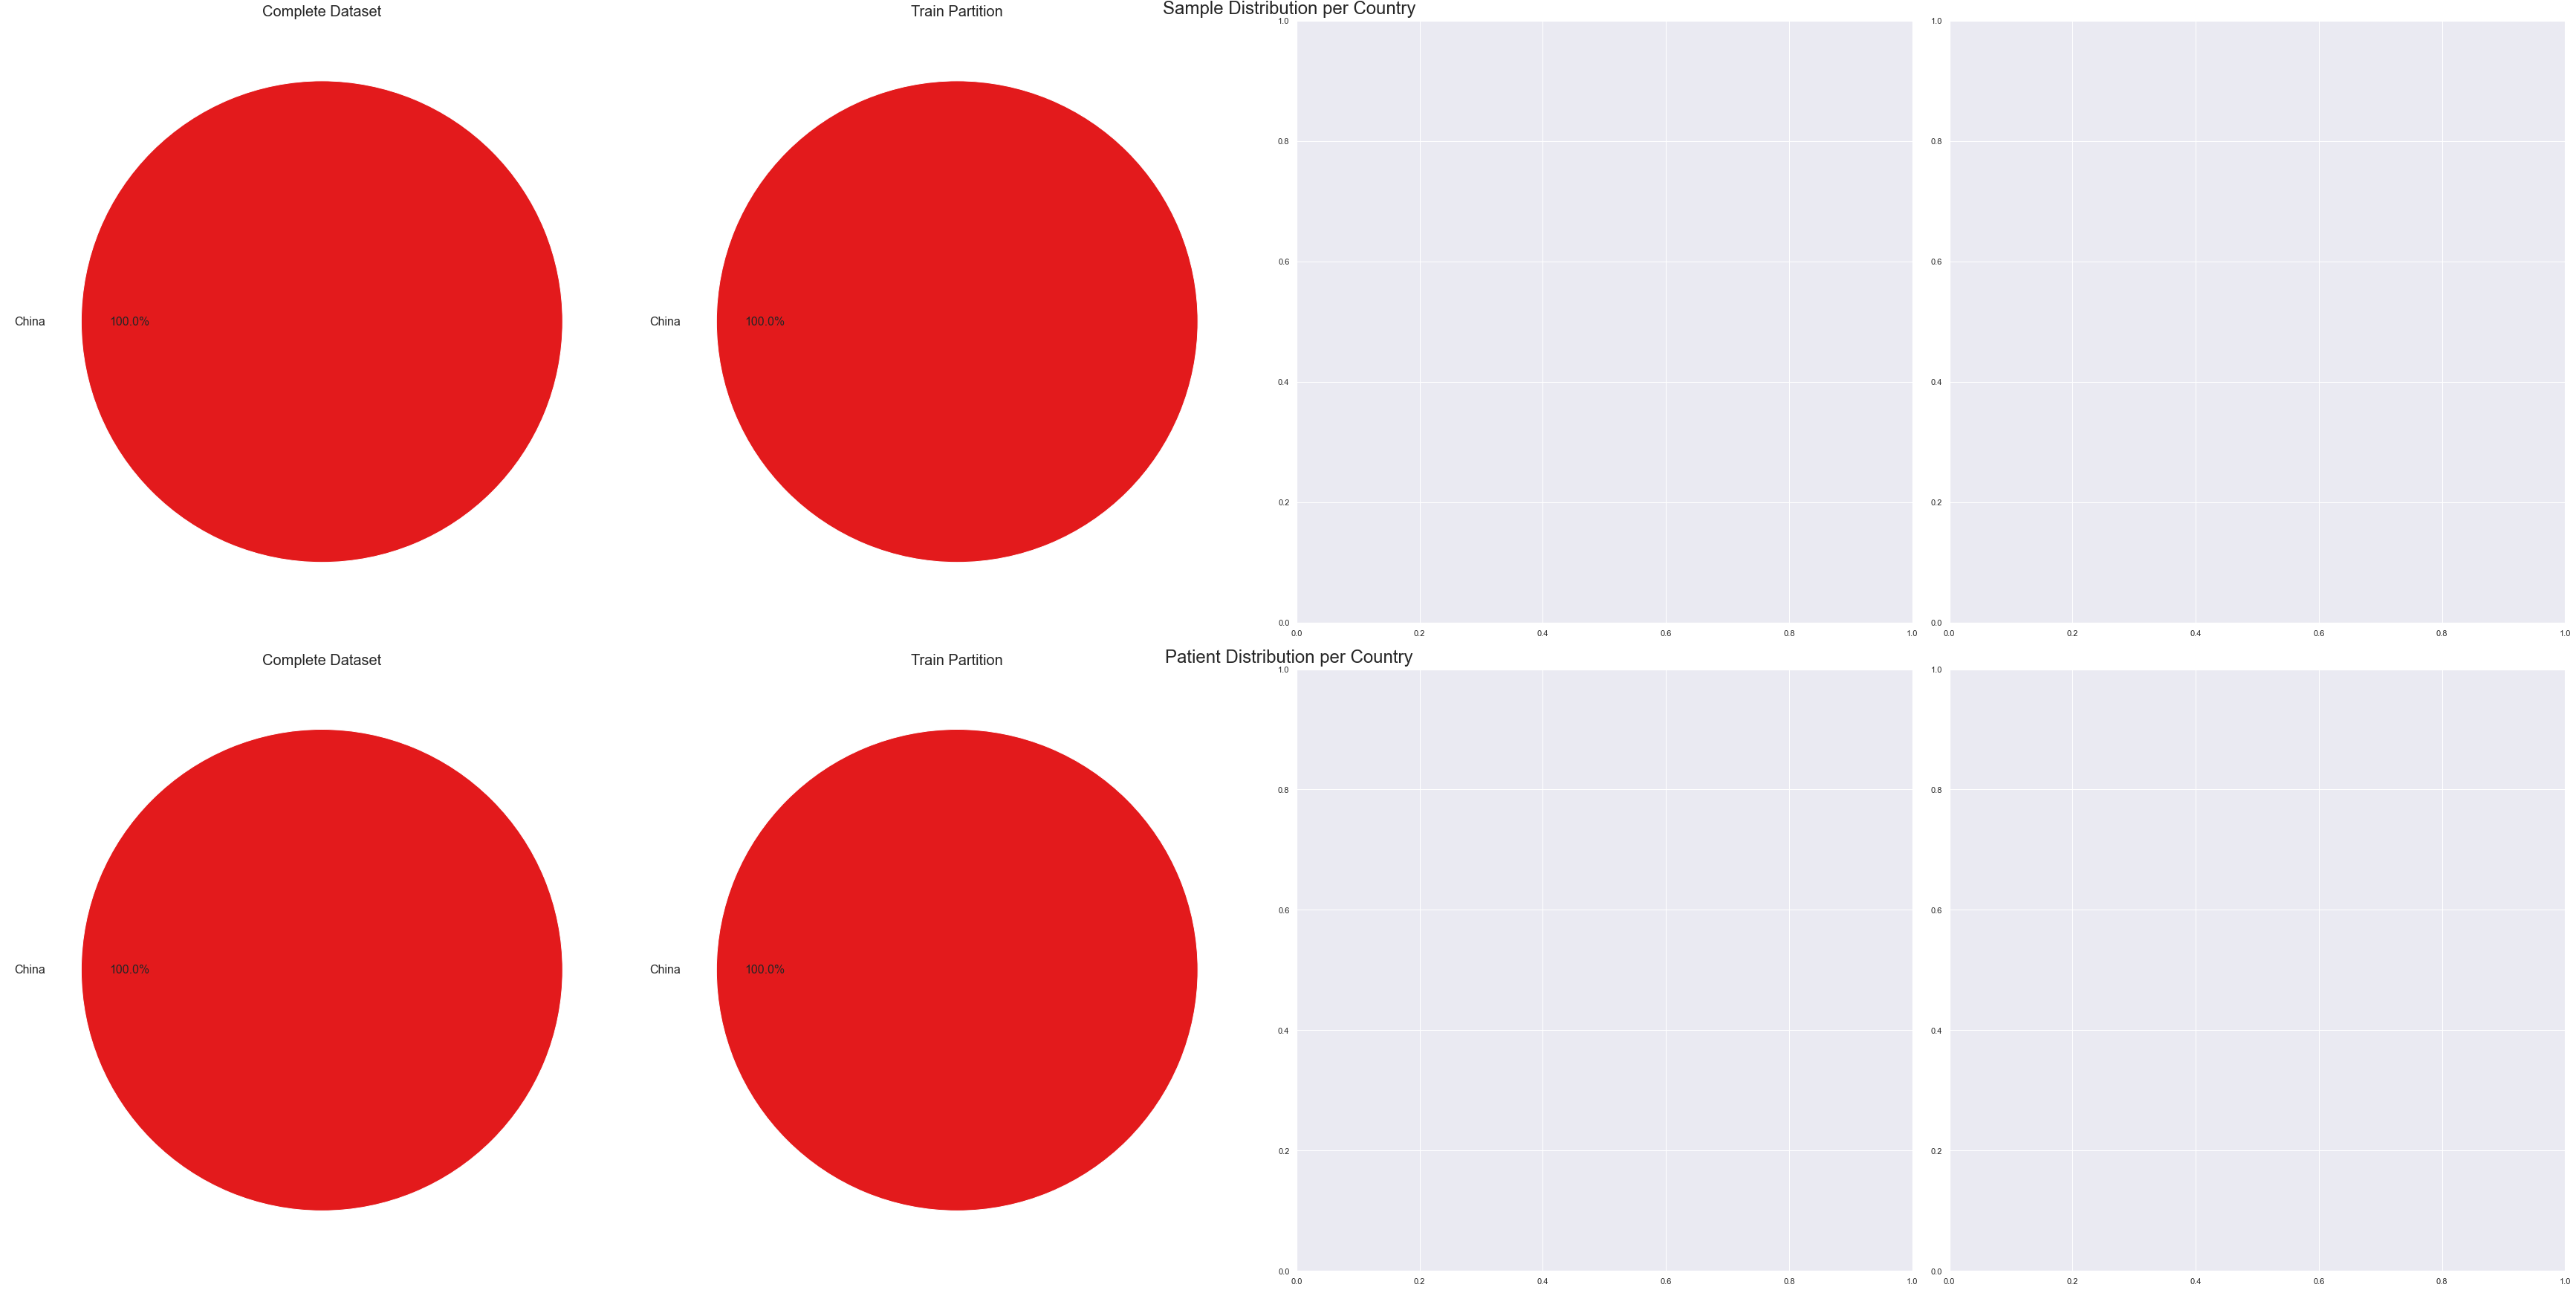

In [15]:
plot.column_as_pies( samples_df, patient_df, "country", dataset_name, figsize = (48, 24) )

In [16]:
plot.column_as_table( samples_df, patient_df, "country", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
France,0,0,0,0
China,45912,45912,0,0
Iran,0,0,0,0
USA,0,0,0,0
N/A,0,0,0,0
Australia,0,0,0,0
Italy,0,0,0,0
Algeria,0,0,0,0
Belgium,0,0,0,0


## Partition

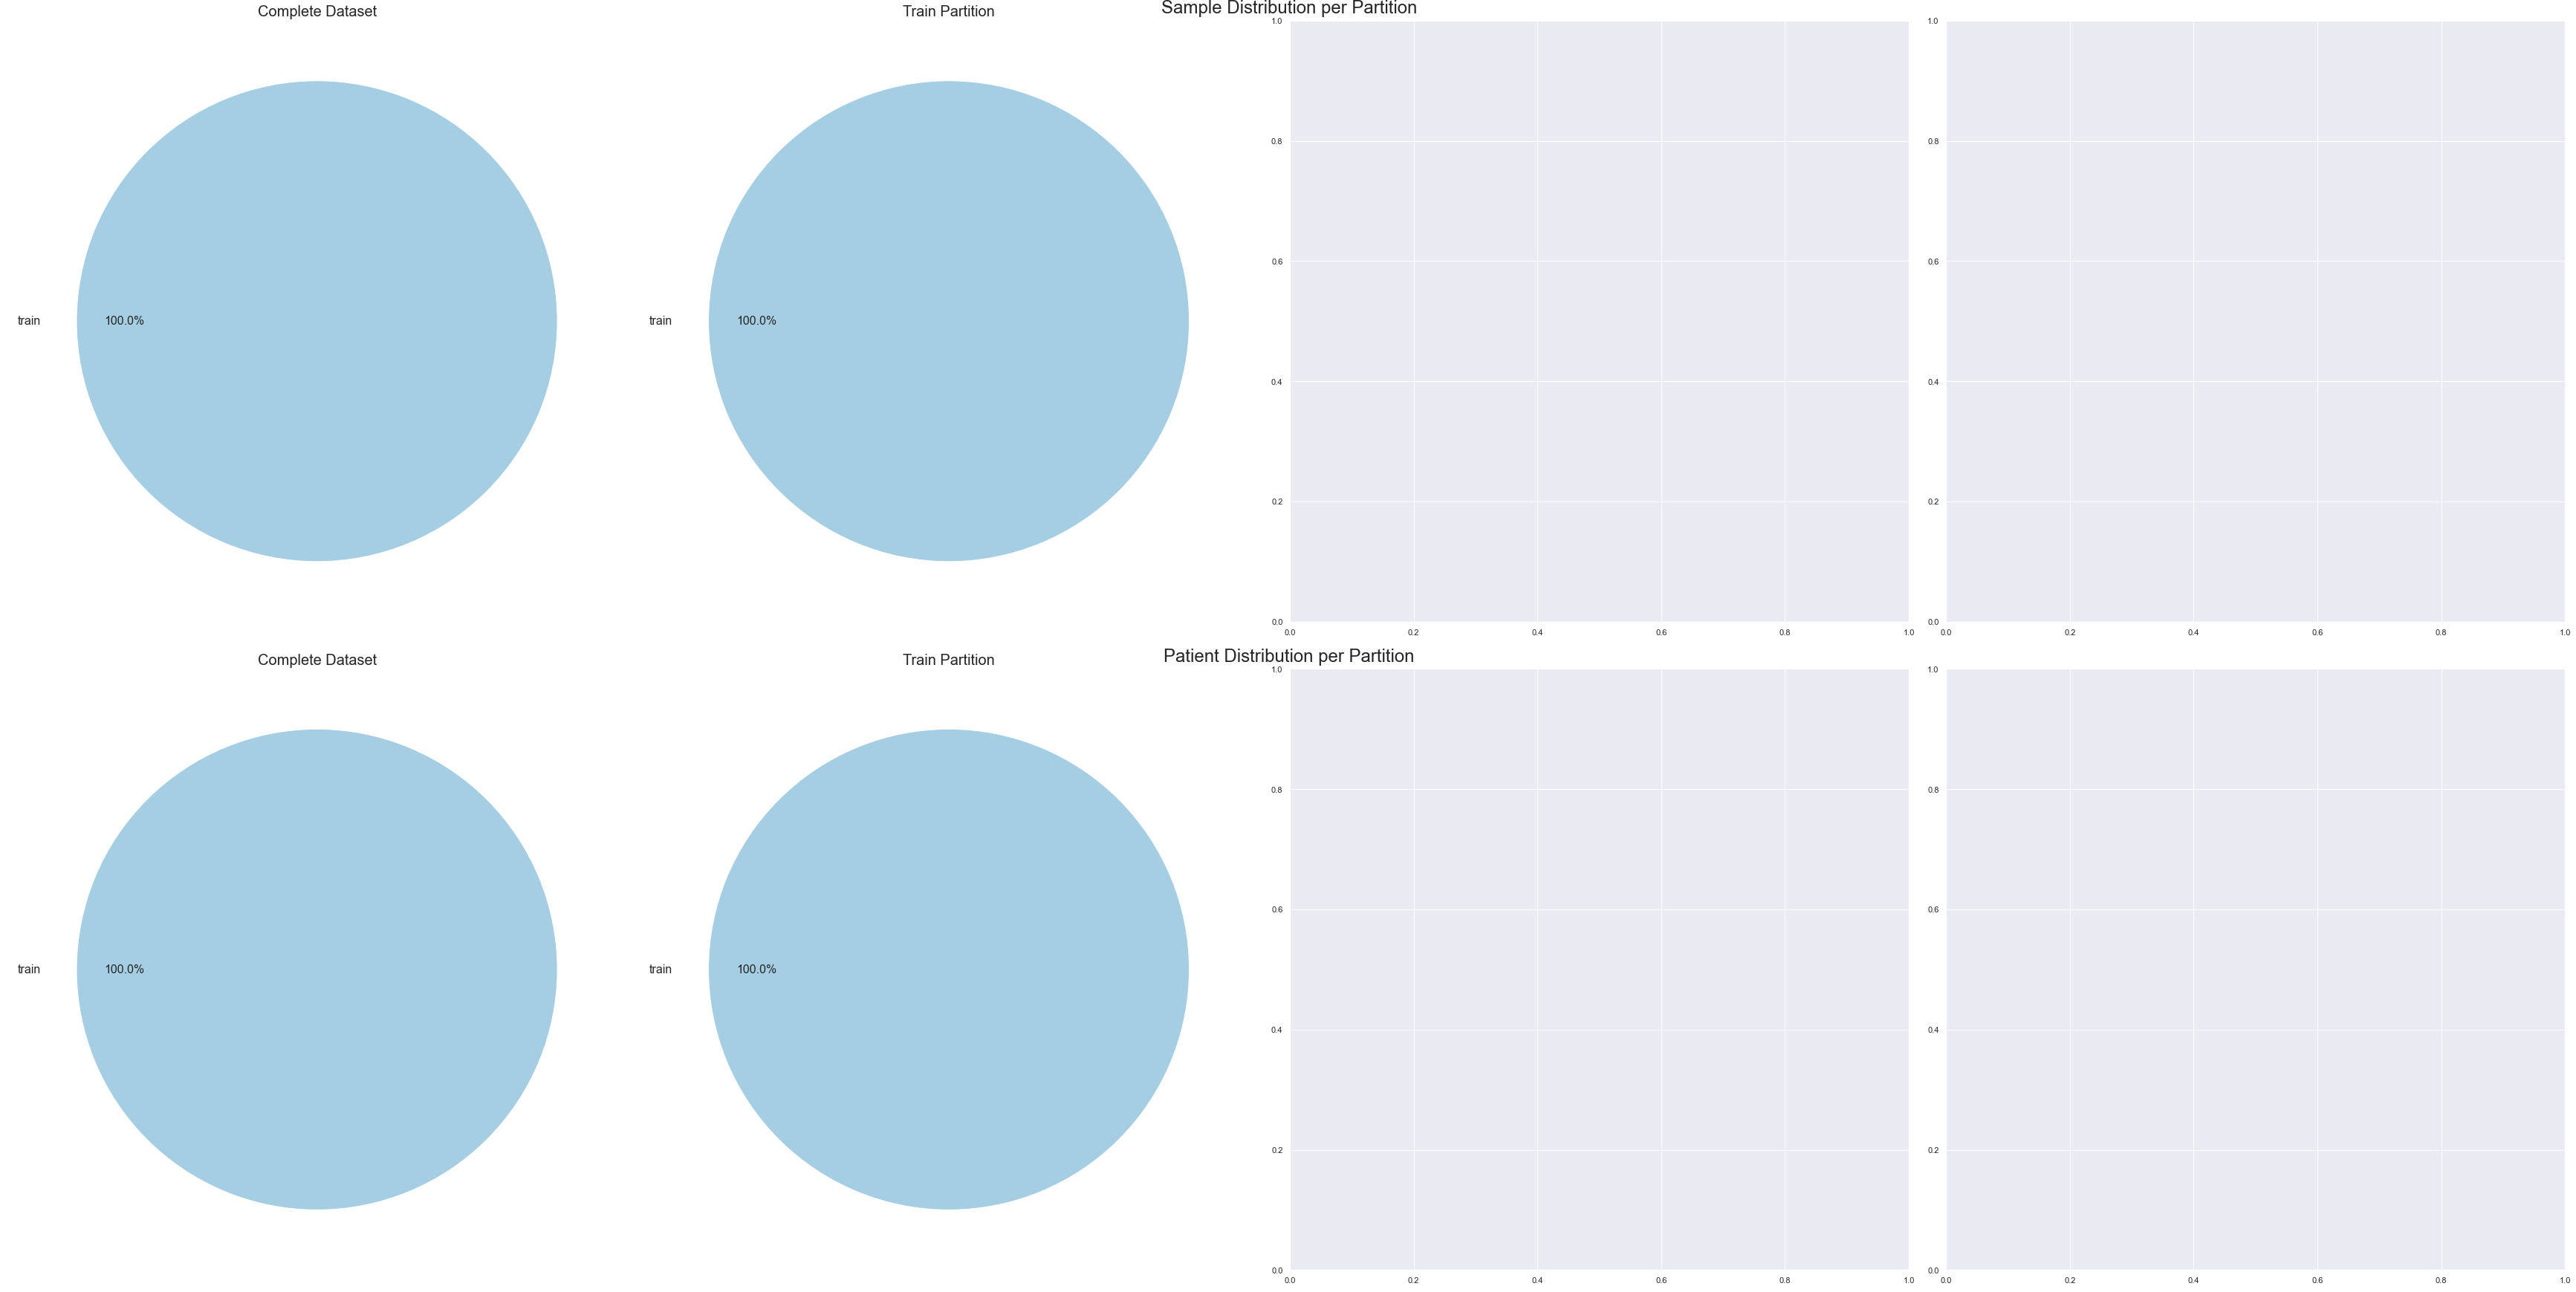

In [17]:
plot.column_as_pies( samples_df, patient_df, "partition", dataset_name, figsize = (48, 24) )

In [18]:
plot.column_as_table( samples_df, patient_df, "partition", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
train,45912,45912,0,0
test,0,0,0,0
val,0,0,0,0
SUM,45912,45912,0,0
,Dataset,Train,Val,Test
Values,,,,
train,709,709,0,0
val,0,0,0,0
test,0,0,0,0


## Slice Selection

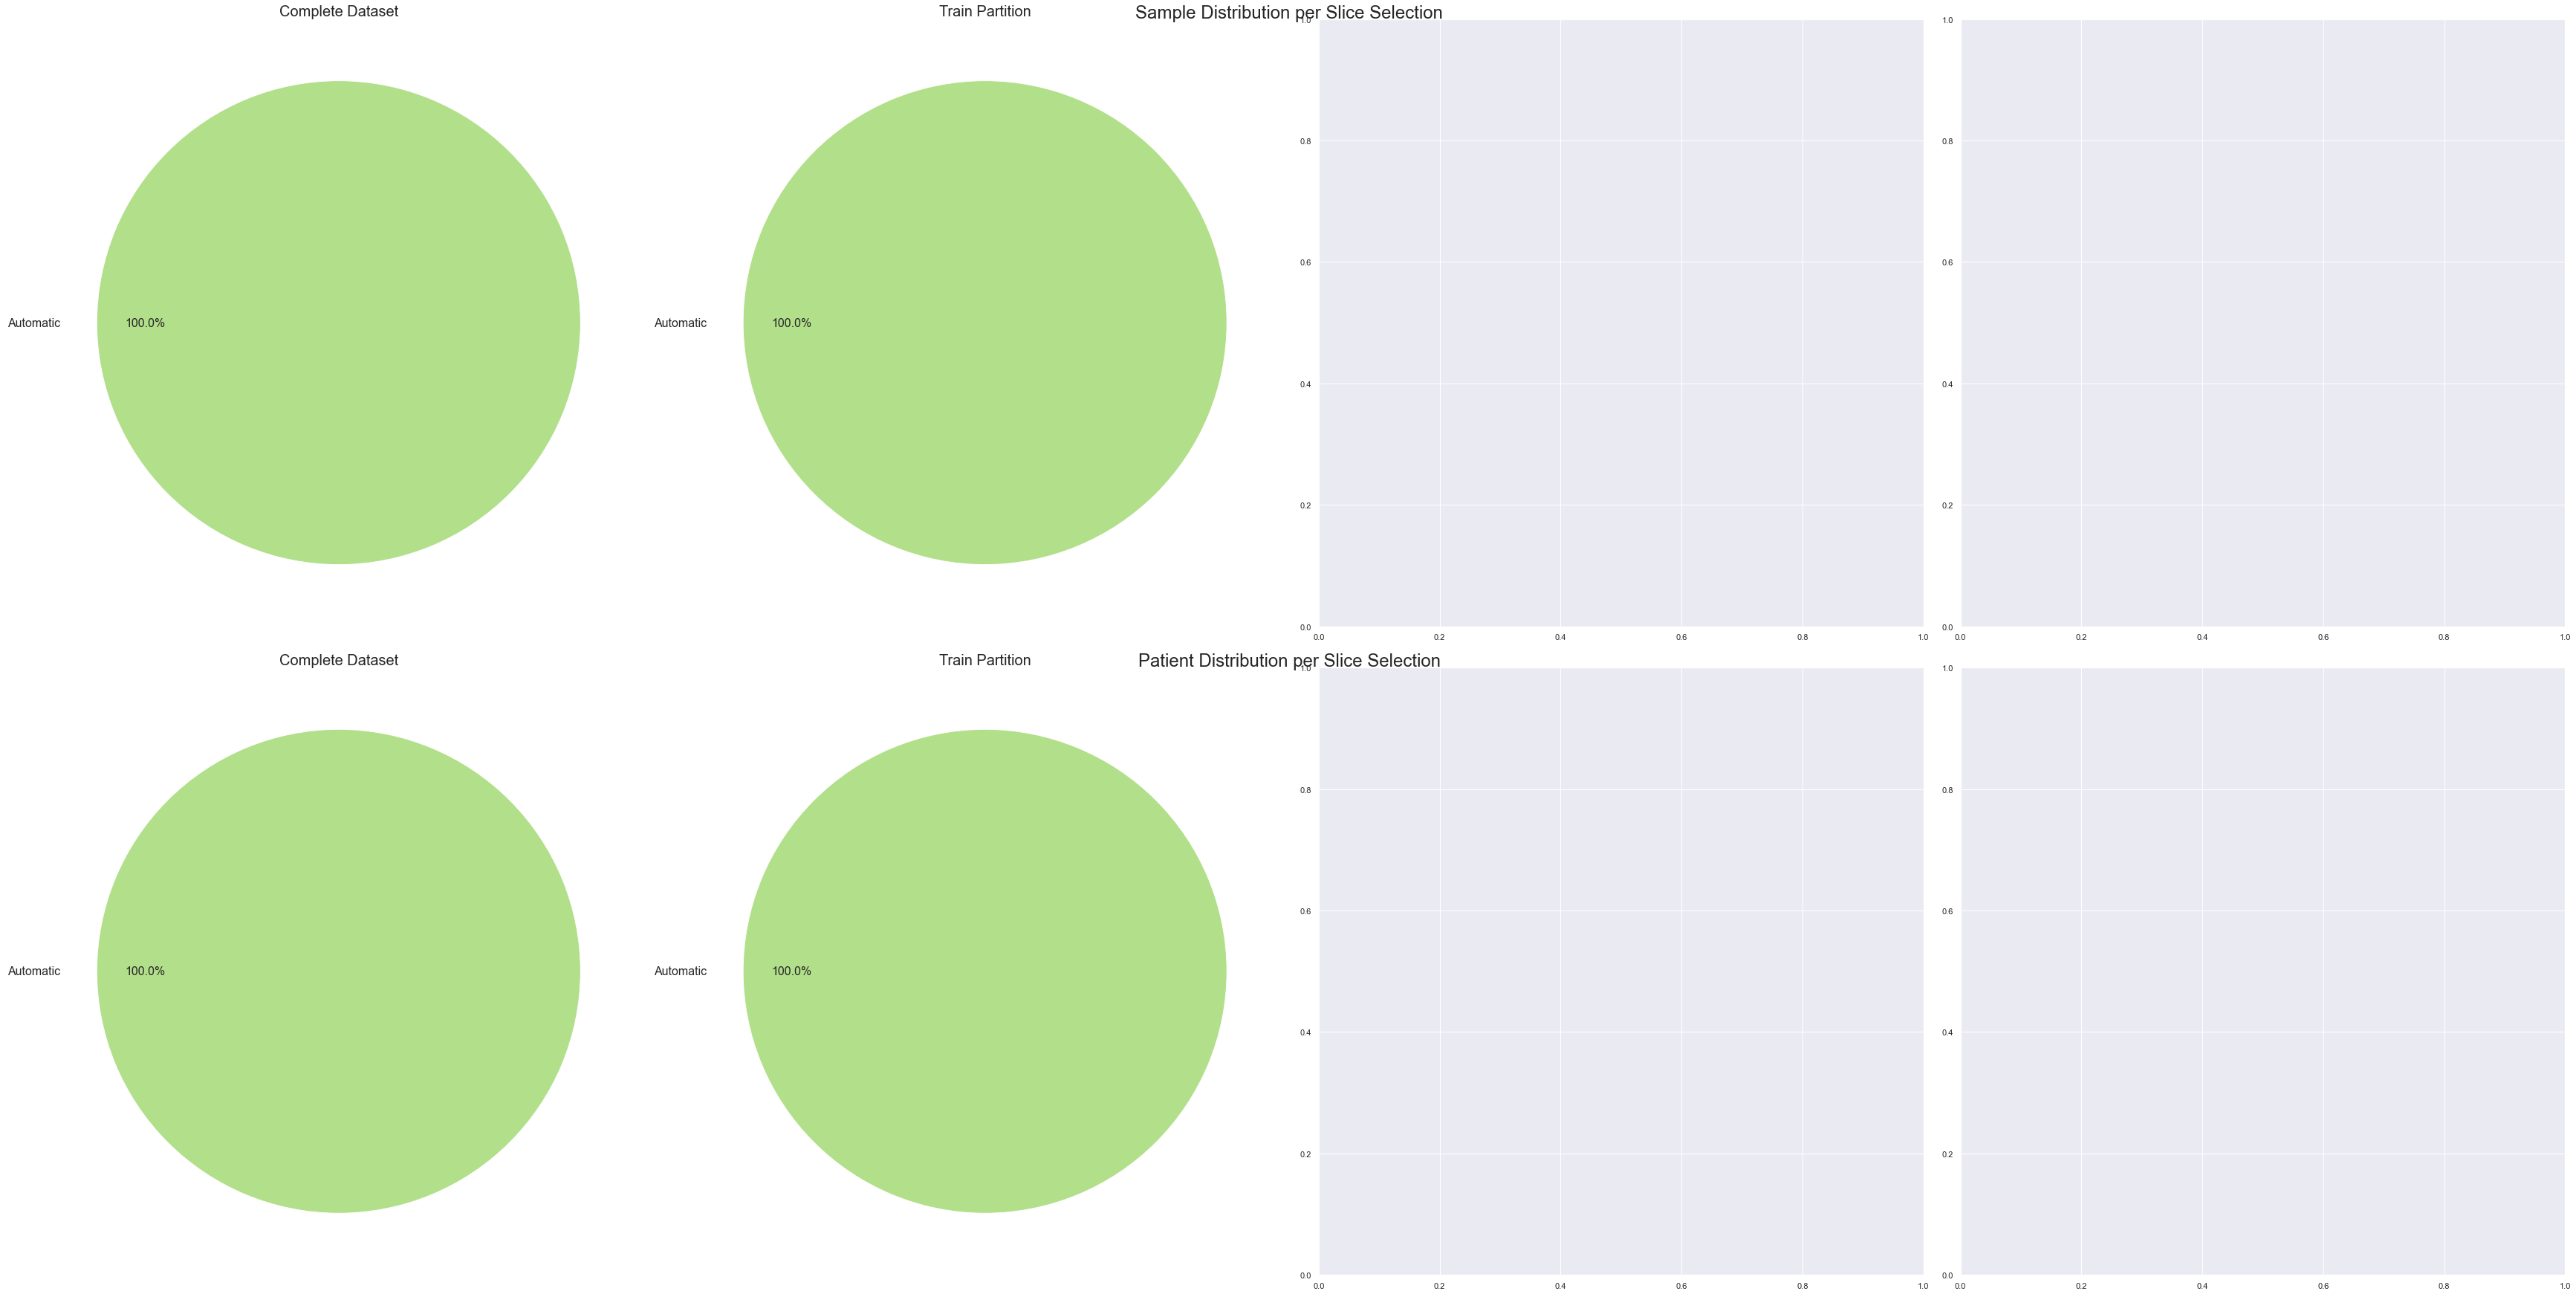

In [19]:
plot.column_as_pies( samples_df, patient_df, "slice_selection", dataset_name, figsize = (48, 24) )

In [20]:
plot.column_as_table( samples_df, patient_df, "slice_selection", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
Automatic,45912,45912,0,0
Expert,0,0,0,0
N/A,0,0,0,0
Non-expert,0,0,0,0
SUM,45912,45912,0,0
,Dataset,Train,Val,Test
Values,,,,
Automatic,709,709,0,0
Expert,0,0,0,0


# Data Split

In [21]:
new_samples_df, new_patient_df = split.dataset_by_samples( samples_df, patient_df, dataset_name, seed = 1 )

    1/33: Group ('M', 'COVID-19', 'Automatic', 'China', (5, 10))
	[Test] Moved 0 samples (0 patients), expected 12 samples, had 61 samples (1 patients)...
		List of sample counts: [61]
	[Val] Moved 0 samples (0 patients), expected 12 samples, had 61 samples (1 patients)...
		List of sample counts: [61]



    2/33: Group ('M', 'COVID-19', 'Automatic', 'China', (10, 15))
	[Test] Moved 0 samples (0 patients), expected 0 samples, had 2 samples (1 patients)...
		List of sample counts: [2]
	[Val] Moved 0 samples (0 patients), expected 0 samples, had 2 samples (1 patients)...
		List of sample counts: [2]



    3/33: Group ('F', 'COVID-19', 'Automatic', 'China', (15, 20))
	[Test] Moved 0 samples (0 patients), expected 5 samples, had 28 samples (1 patients)...
		List of sample counts: [28]
	[Val] Moved 0 samples (0 patients), expected 5 samples, had 28 samples (1 patients)...
		List of sample counts: [28]



    4/33: Group ('M', 'COVID-19', 'Automatic', 'China', (20, 25))
	[Test] Moved 16 sa

	[Test] Moved 101 samples (4 patients), expected 112 samples, had 563 samples (9 patients)...
		List of sample counts: [7, 151, 129, 33, 20, 61, 74, 41, 47]
	[Val] Moved 108 samples (2 patients), expected 112 samples, had 462 samples (5 patients)...
		List of sample counts: [151, 129, 61, 74, 47]



   27/33: Group ('F', 'COVID-19', 'Automatic', 'China', (75, 80))
	[Test] Moved 164 samples (4 patients), expected 164 samples, had 824 samples (15 patients)...
		List of sample counts: [86, 28, 99, 83, 11, 39, 83, 59, 9, 6, 17, 122, 45, 76, 61]
	[Val] Moved 164 samples (3 patients), expected 164 samples, had 660 samples (11 patients)...
		List of sample counts: [99, 83, 83, 59, 9, 6, 17, 122, 45, 76, 61]



   28/33: Group ('M', 'COVID-19', 'Automatic', 'China', (80, 85))
	[Test] Moved 61 samples (1 patients), expected 74 samples, had 371 samples (7 patients)...
		List of sample counts: [61, 70, 16, 97, 21, 51, 55]
	[Val] Moved 70 samples (1 patients), expected 74 samples, had 310 samples 

# Post Split Plots

## Class

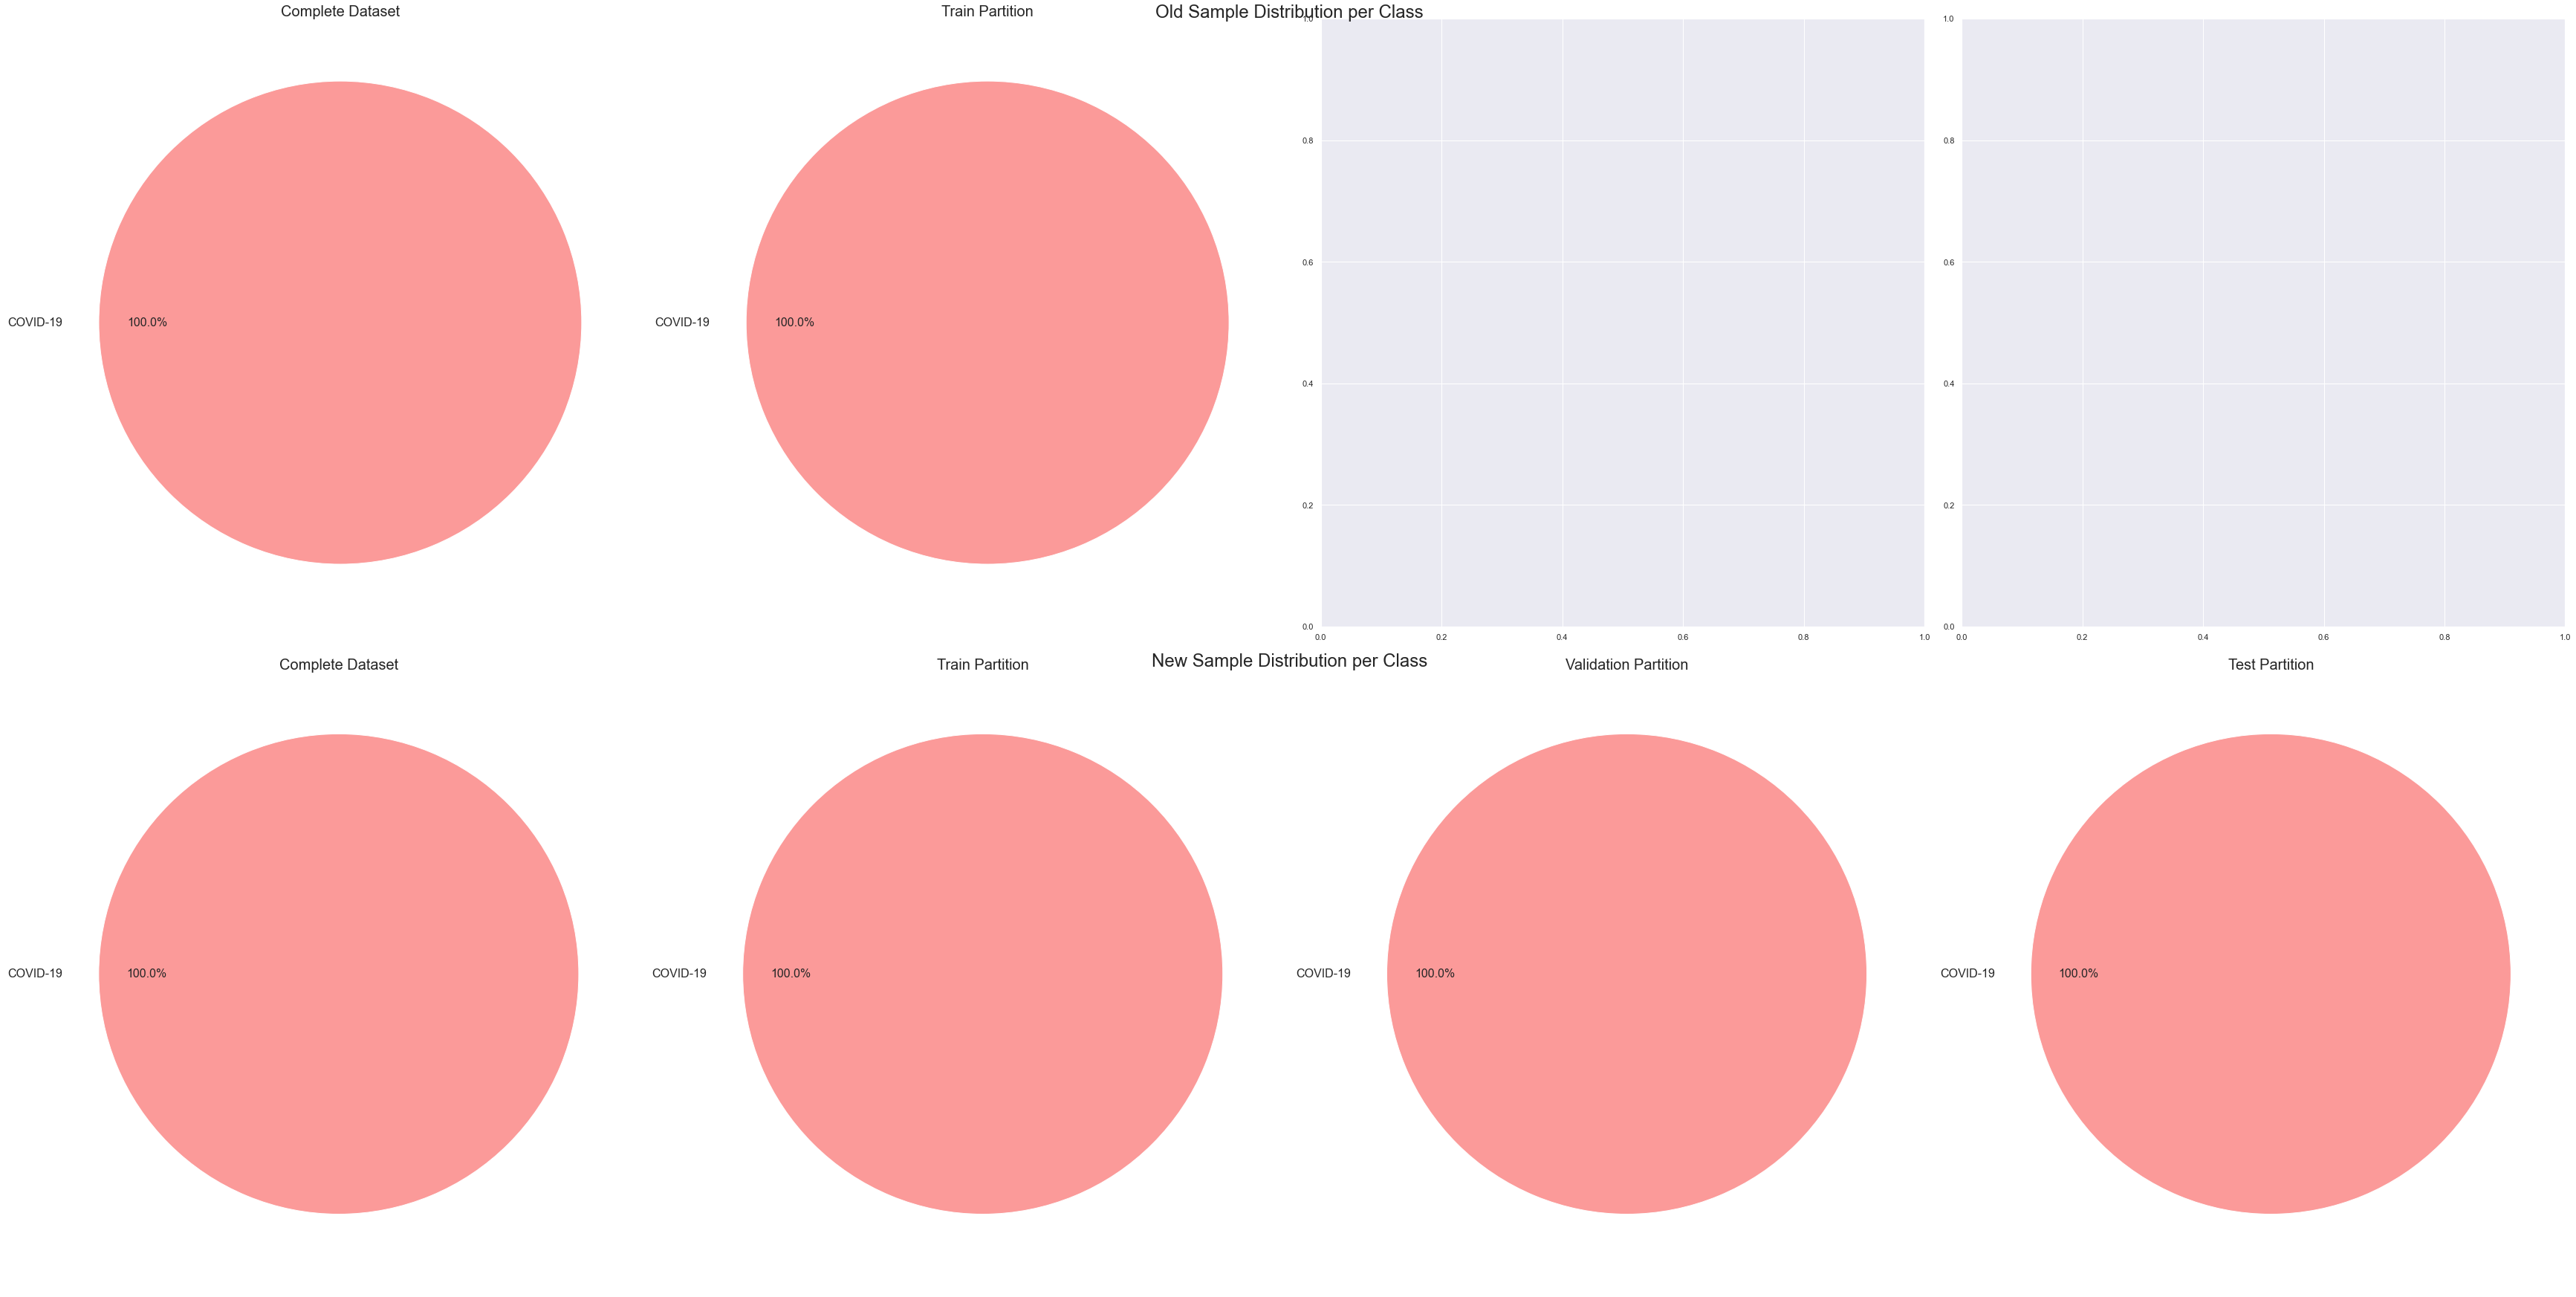

In [22]:
plot.column_as_pies( samples_df, new_samples_df, "class", dataset_name, figsize = (48, 24), resplit = True )

In [23]:
plot.column_as_table( samples_df, new_samples_df, "class", dataset_name, bin_flag = False, resplit = True )

,Dataset,Train,Val,Test
Values,,,,
COVID-19,45912,45912,0,0
Normal,0,0,0,0
Pneumonia,0,0,0,0
SUM,45912,45912,0,0
,Dataset,Train,Val,Test
Values,,,,
COVID-19,45912,28116,8847,8949
SUM,45912,28116,8847,8949


## Age

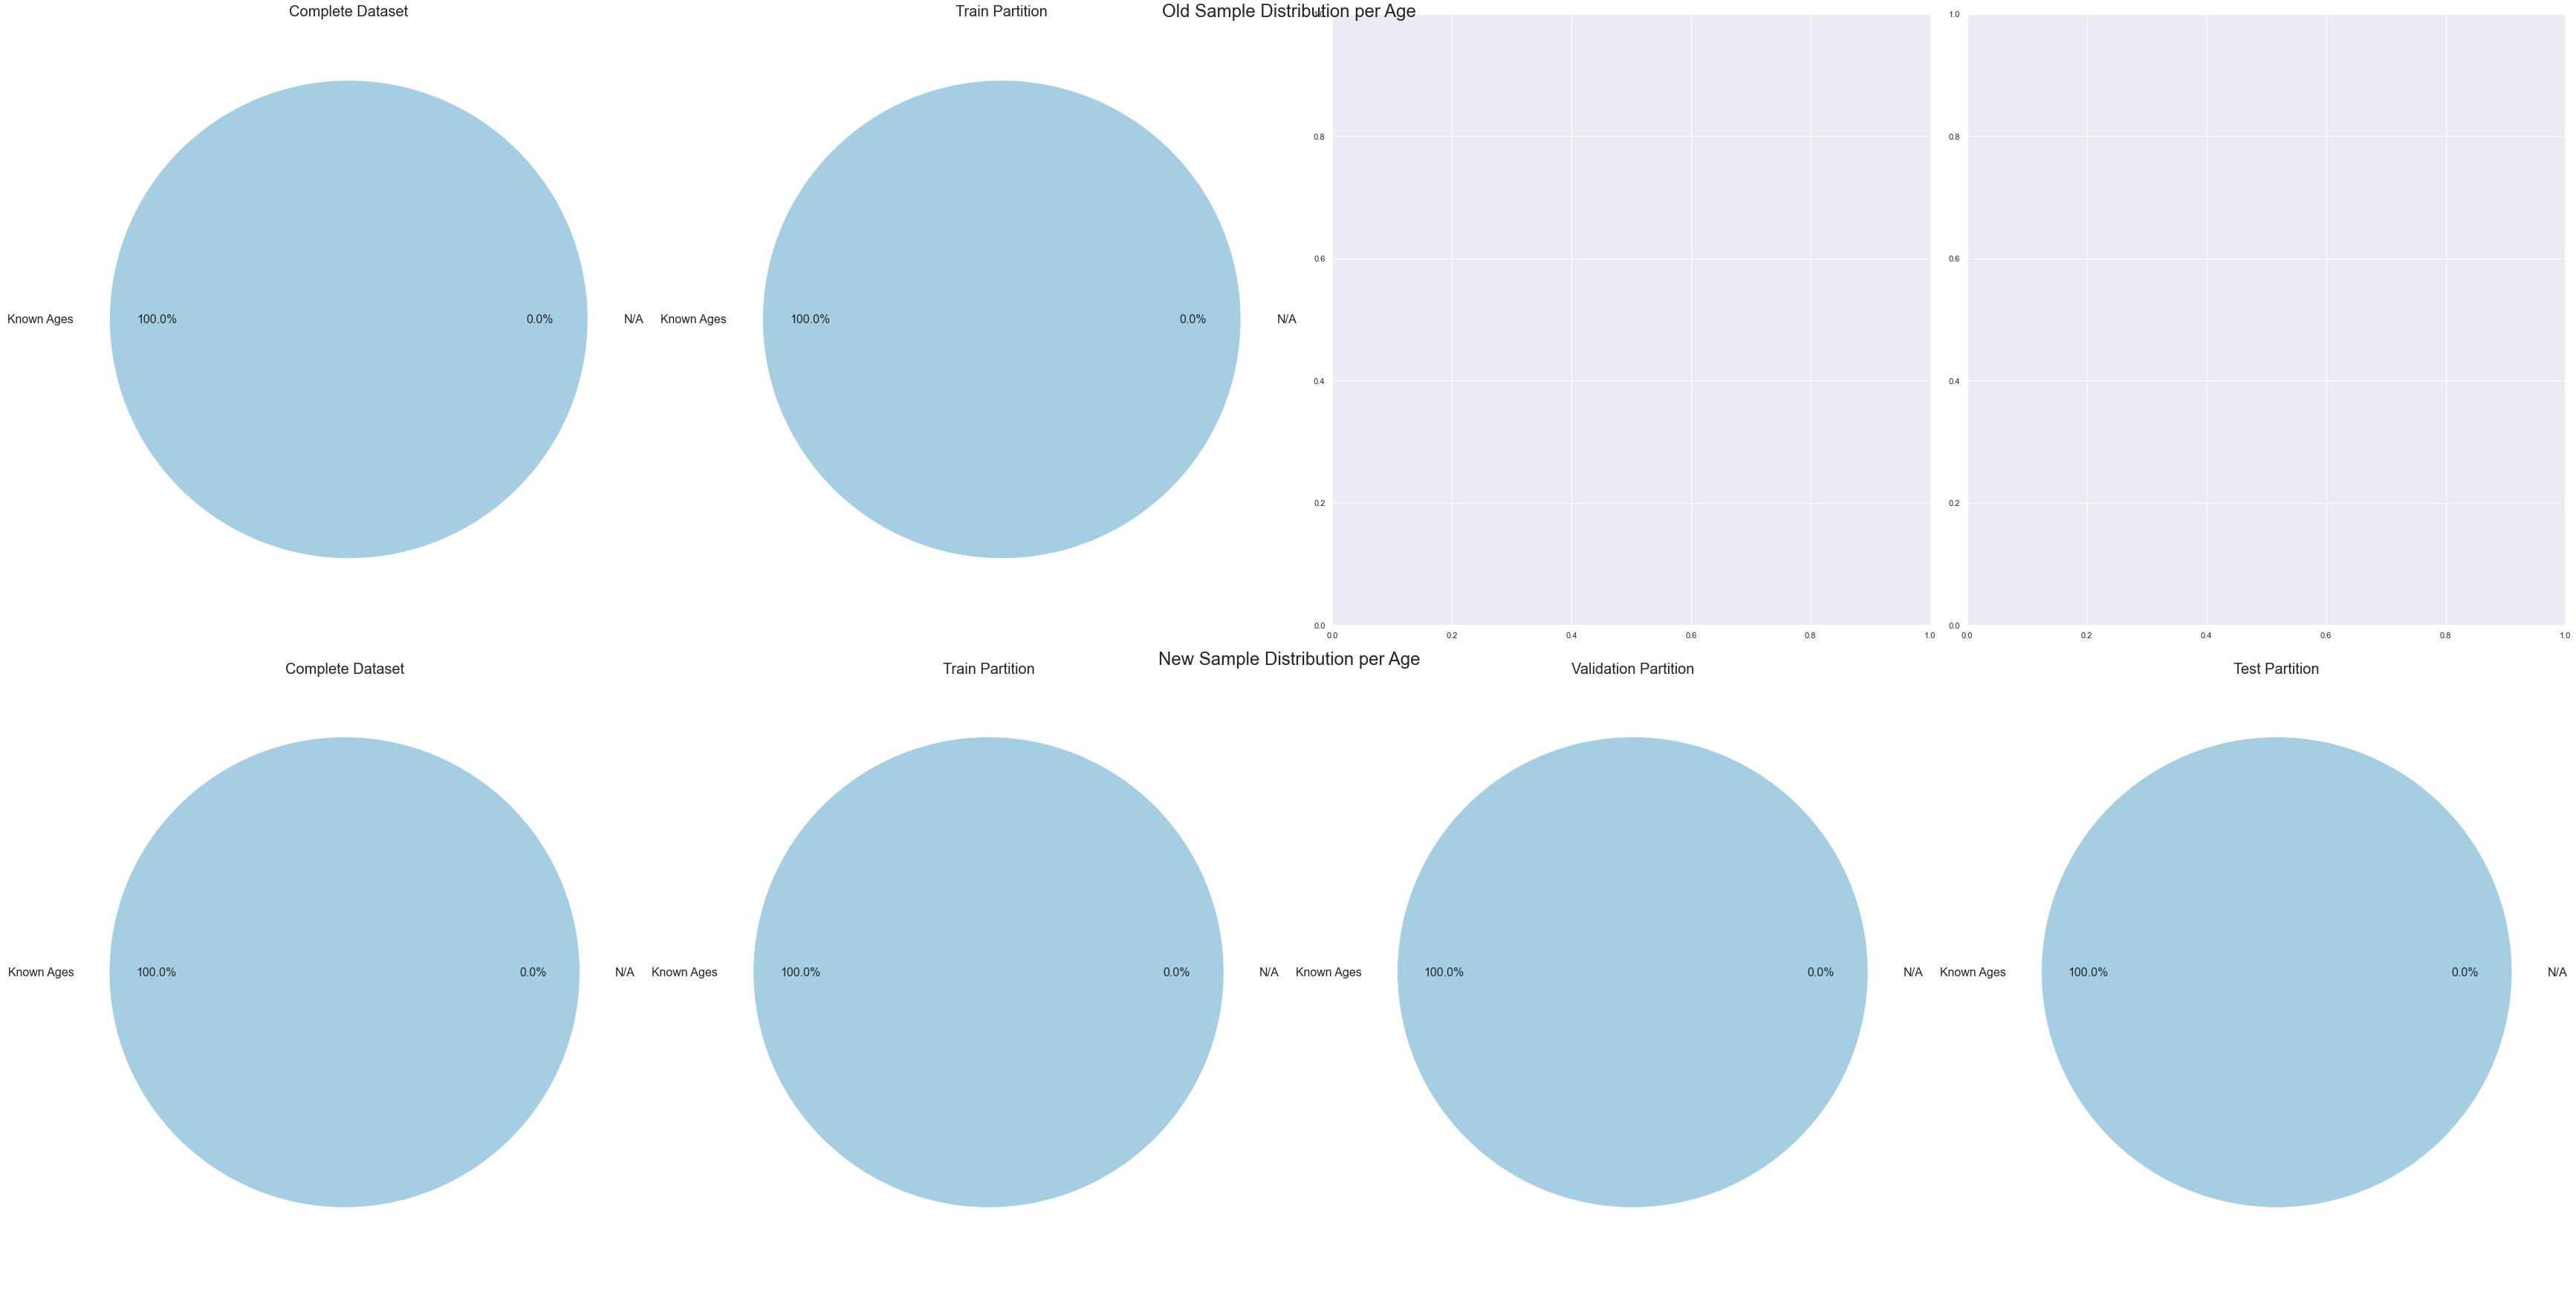

In [24]:
plot.column_as_pies( samples_df, new_samples_df, "age", dataset_name, figsize = (48, 24), resplit = True)

In [25]:
plot.column_as_table( samples_df, new_samples_df, "age", dataset_name, bin_flag = False, resplit = True )

,Dataset,Train,Val,Test
Values,,,,
N/A,0,0,0,0
Known Ages,45912,45912,0,0
SUM,45912,45912,0,0
,Dataset,Train,Val,Test
Values,,,,
N/A,0,0,0,0
Known Ages,45912,28116,8847,8949
SUM,45912,28116,8847,8949


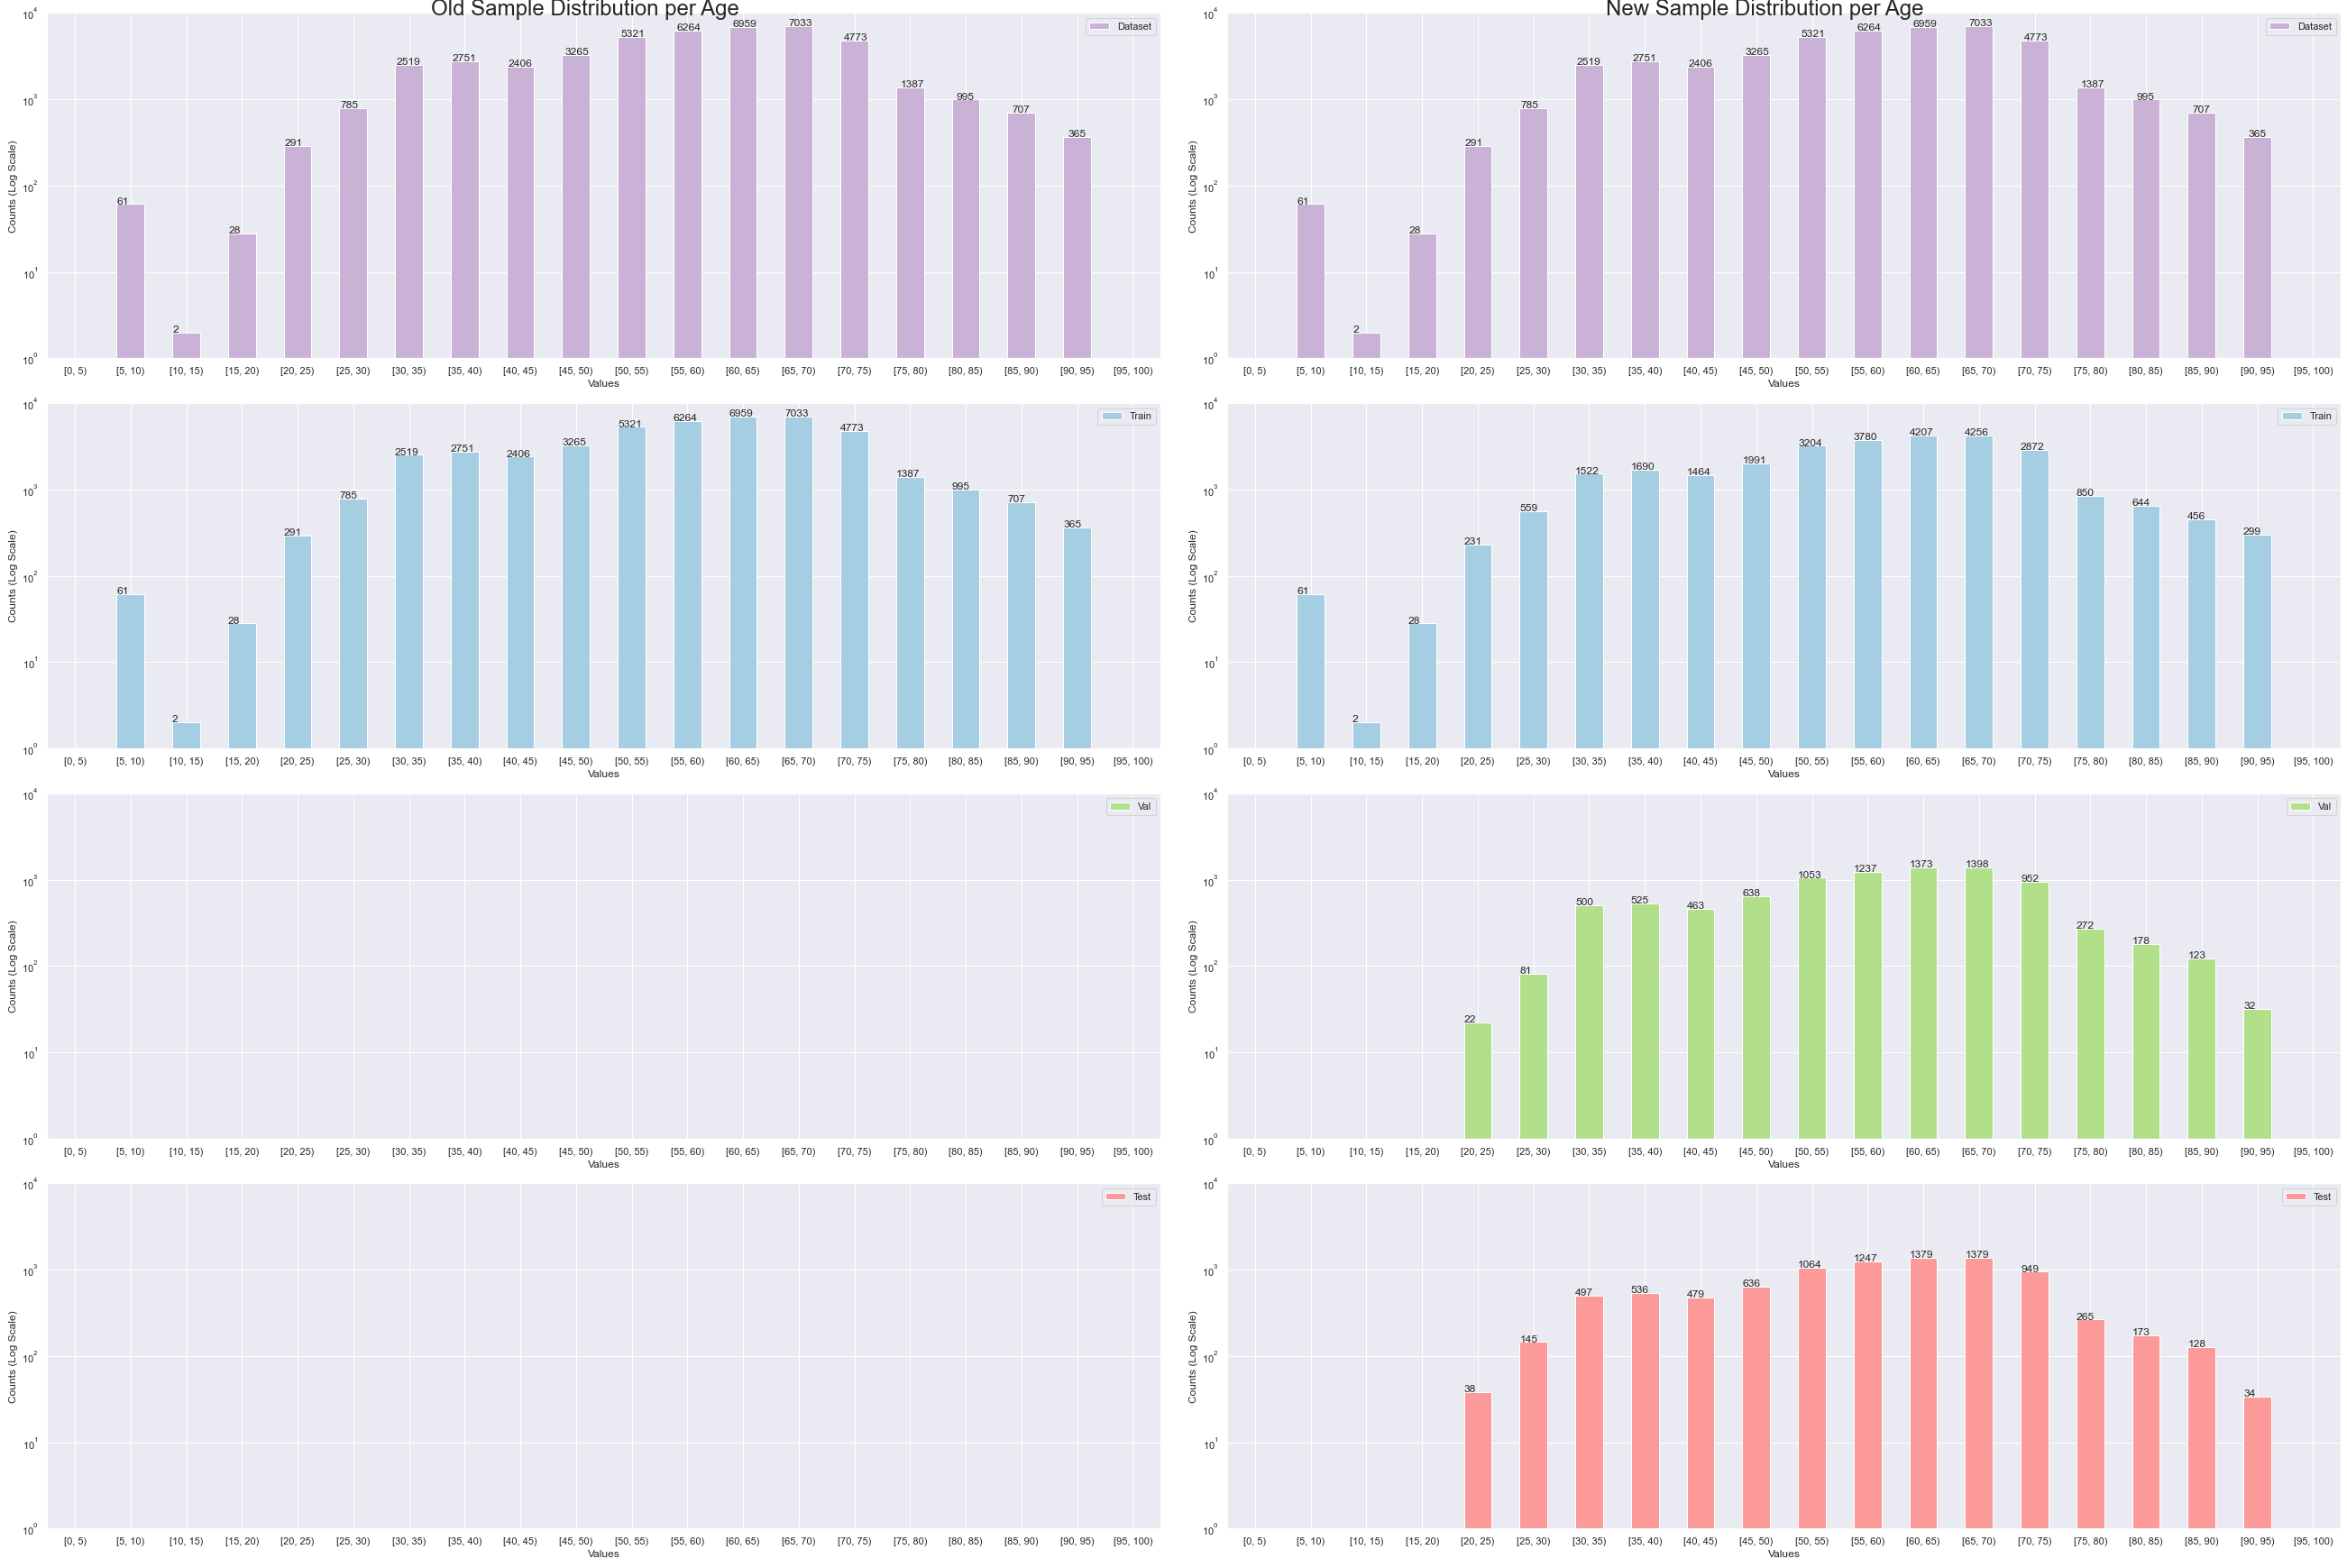

In [26]:
plot.column_as_histograms( samples_df, new_samples_df, "age", dataset_name, figsize = (36, 24), resplit = True)

In [27]:
plot.column_as_table( samples_df, new_samples_df, "age", dataset_name, bin_flag = True, resplit = True )

,Dataset,Train,Val,Test
Values,,,,
"[0, 5)",0,0,0,0
"[5, 10)",61,61,0,0
"[10, 15)",2,2,0,0
"[15, 20)",28,28,0,0
"[20, 25)",291,291,0,0
"[25, 30)",785,785,0,0
"[30, 35)",2519,2519,0,0
"[35, 40)",2751,2751,0,0
"[40, 45)",2406,2406,0,0


## Sex

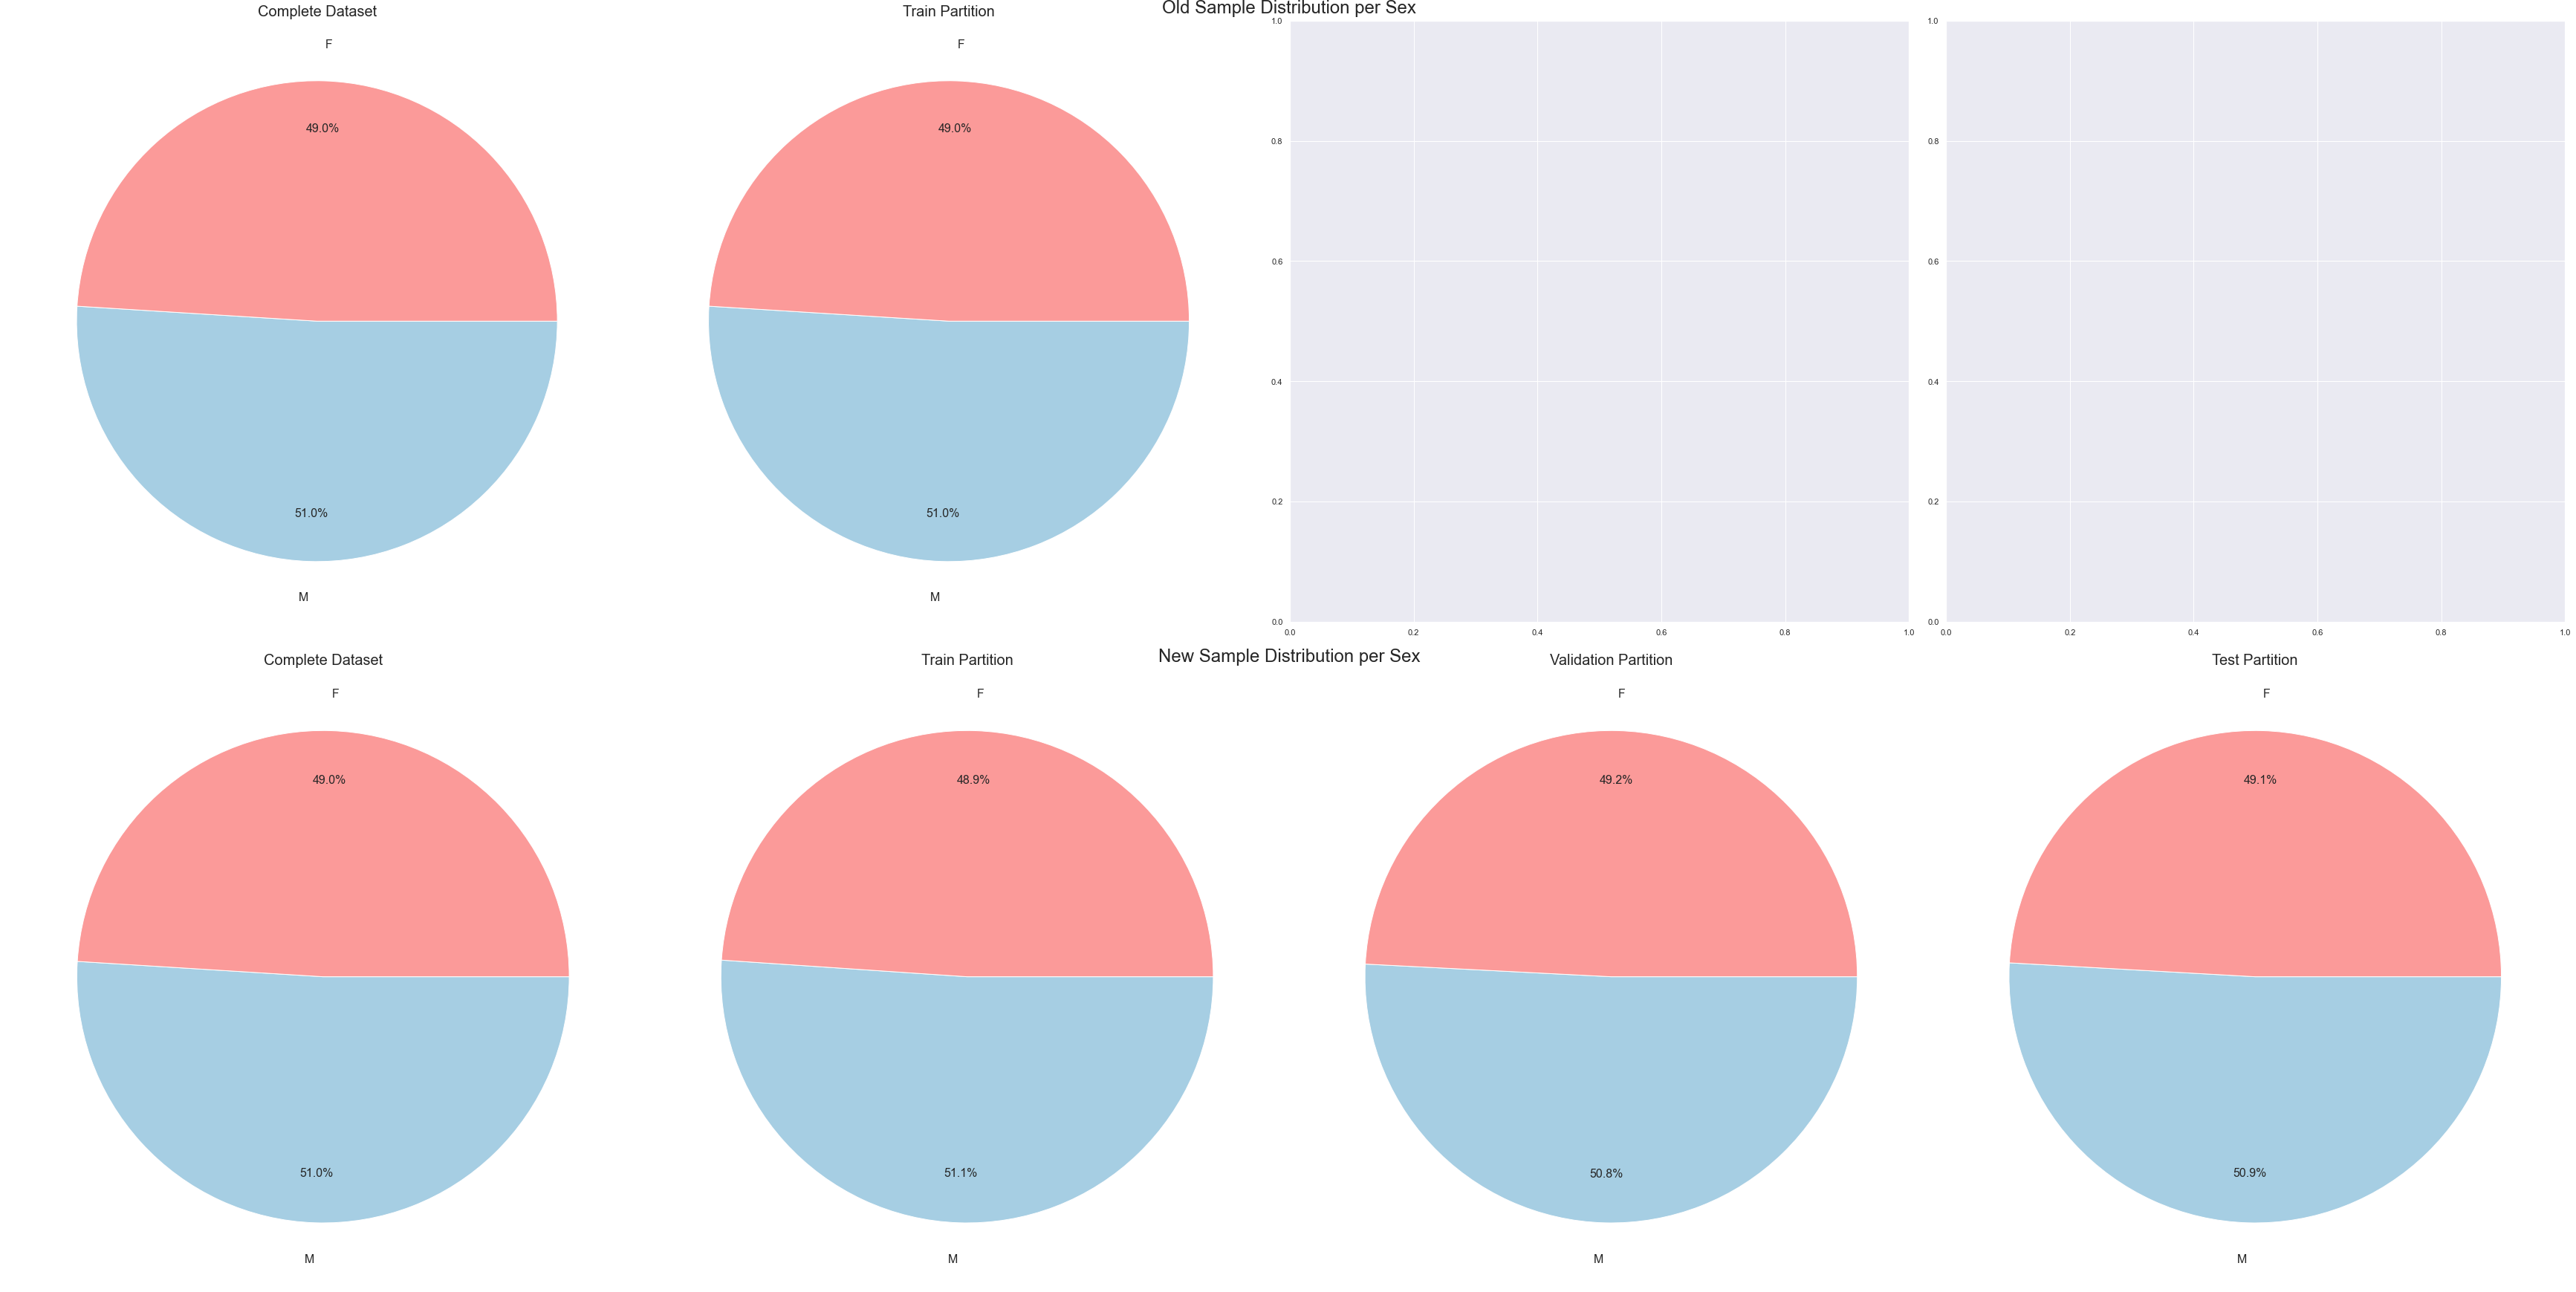

In [28]:
plot.column_as_pies( samples_df, new_samples_df, "sex", dataset_name, figsize = (48, 24), resplit = True )

In [29]:
plot.column_as_table( samples_df, new_samples_df, "sex", dataset_name, bin_flag = False, resplit = True )

,Dataset,Train,Val,Test
Values,,,,
M,23412,23412,0,0
N/A,0,0,0,0
F,22500,22500,0,0
SUM,45912,45912,0,0
,Dataset,Train,Val,Test
Values,,,,
M,23412,14361,4496,4555
F,22500,13755,4351,4394
SUM,45912,28116,8847,8949


## Country

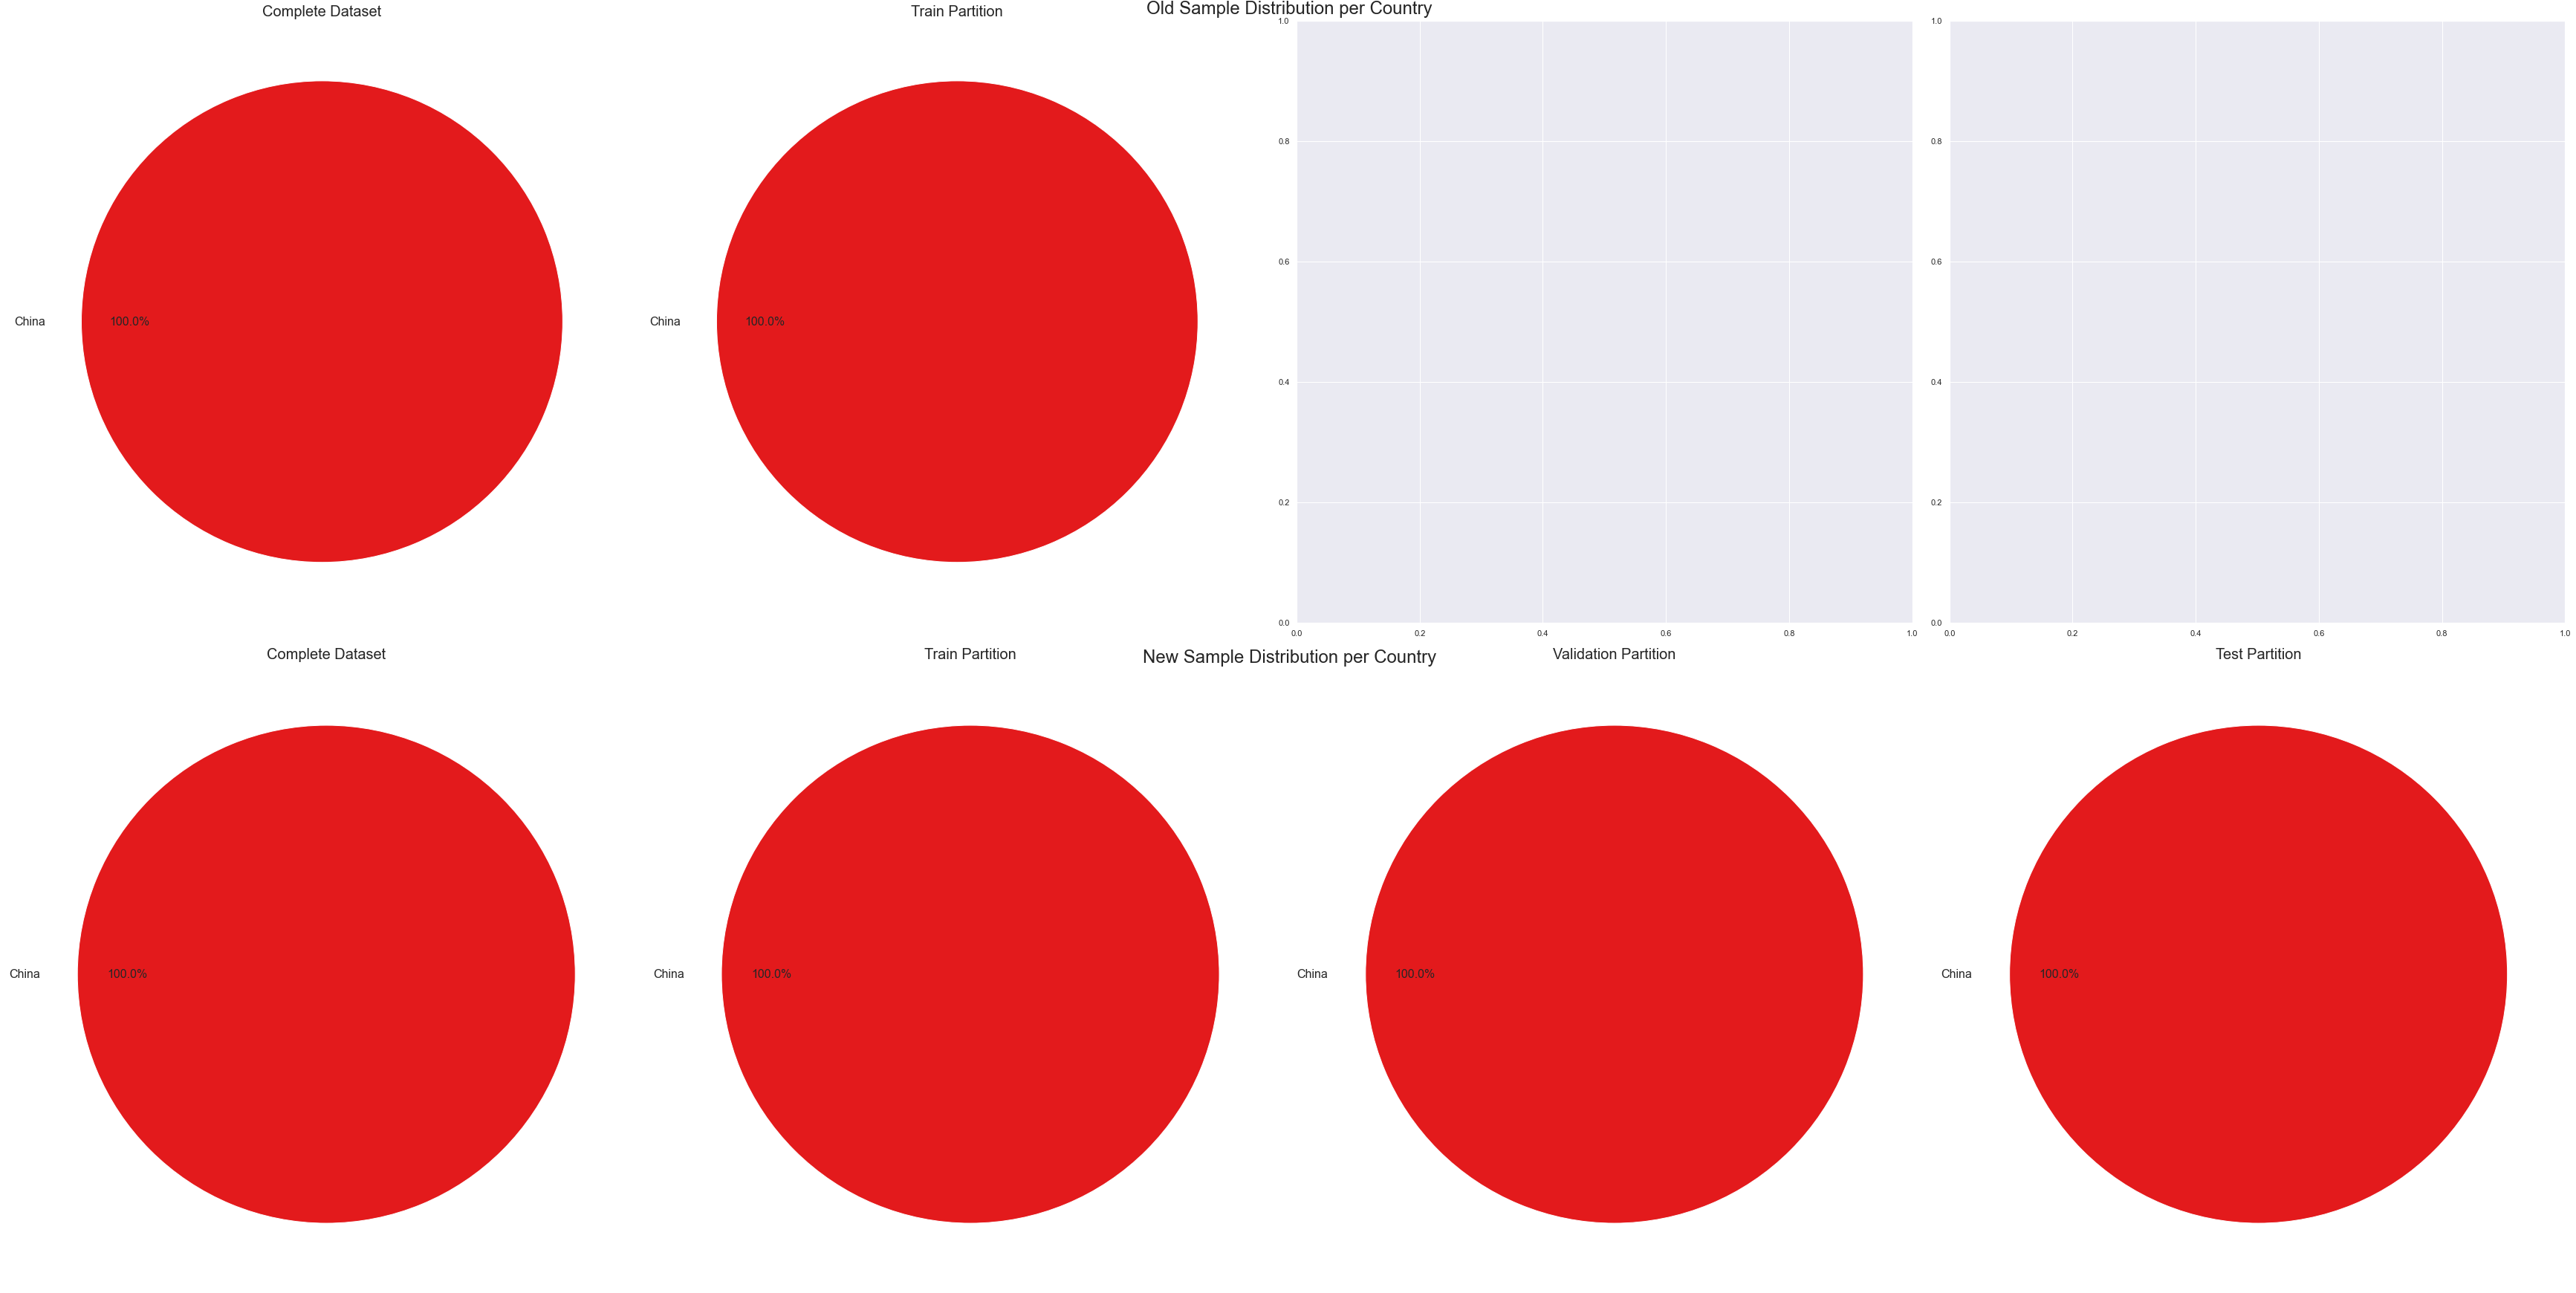

In [30]:
plot.column_as_pies( samples_df, new_samples_df, "country", dataset_name, figsize = (48, 24), resplit = True )

In [31]:
plot.column_as_table( samples_df, new_samples_df, "country", dataset_name, bin_flag = False, resplit = True )

,Dataset,Train,Val,Test
Values,,,,
France,0,0,0,0
China,45912,45912,0,0
Iran,0,0,0,0
USA,0,0,0,0
N/A,0,0,0,0
Australia,0,0,0,0
Italy,0,0,0,0
Algeria,0,0,0,0
Belgium,0,0,0,0


## Partition

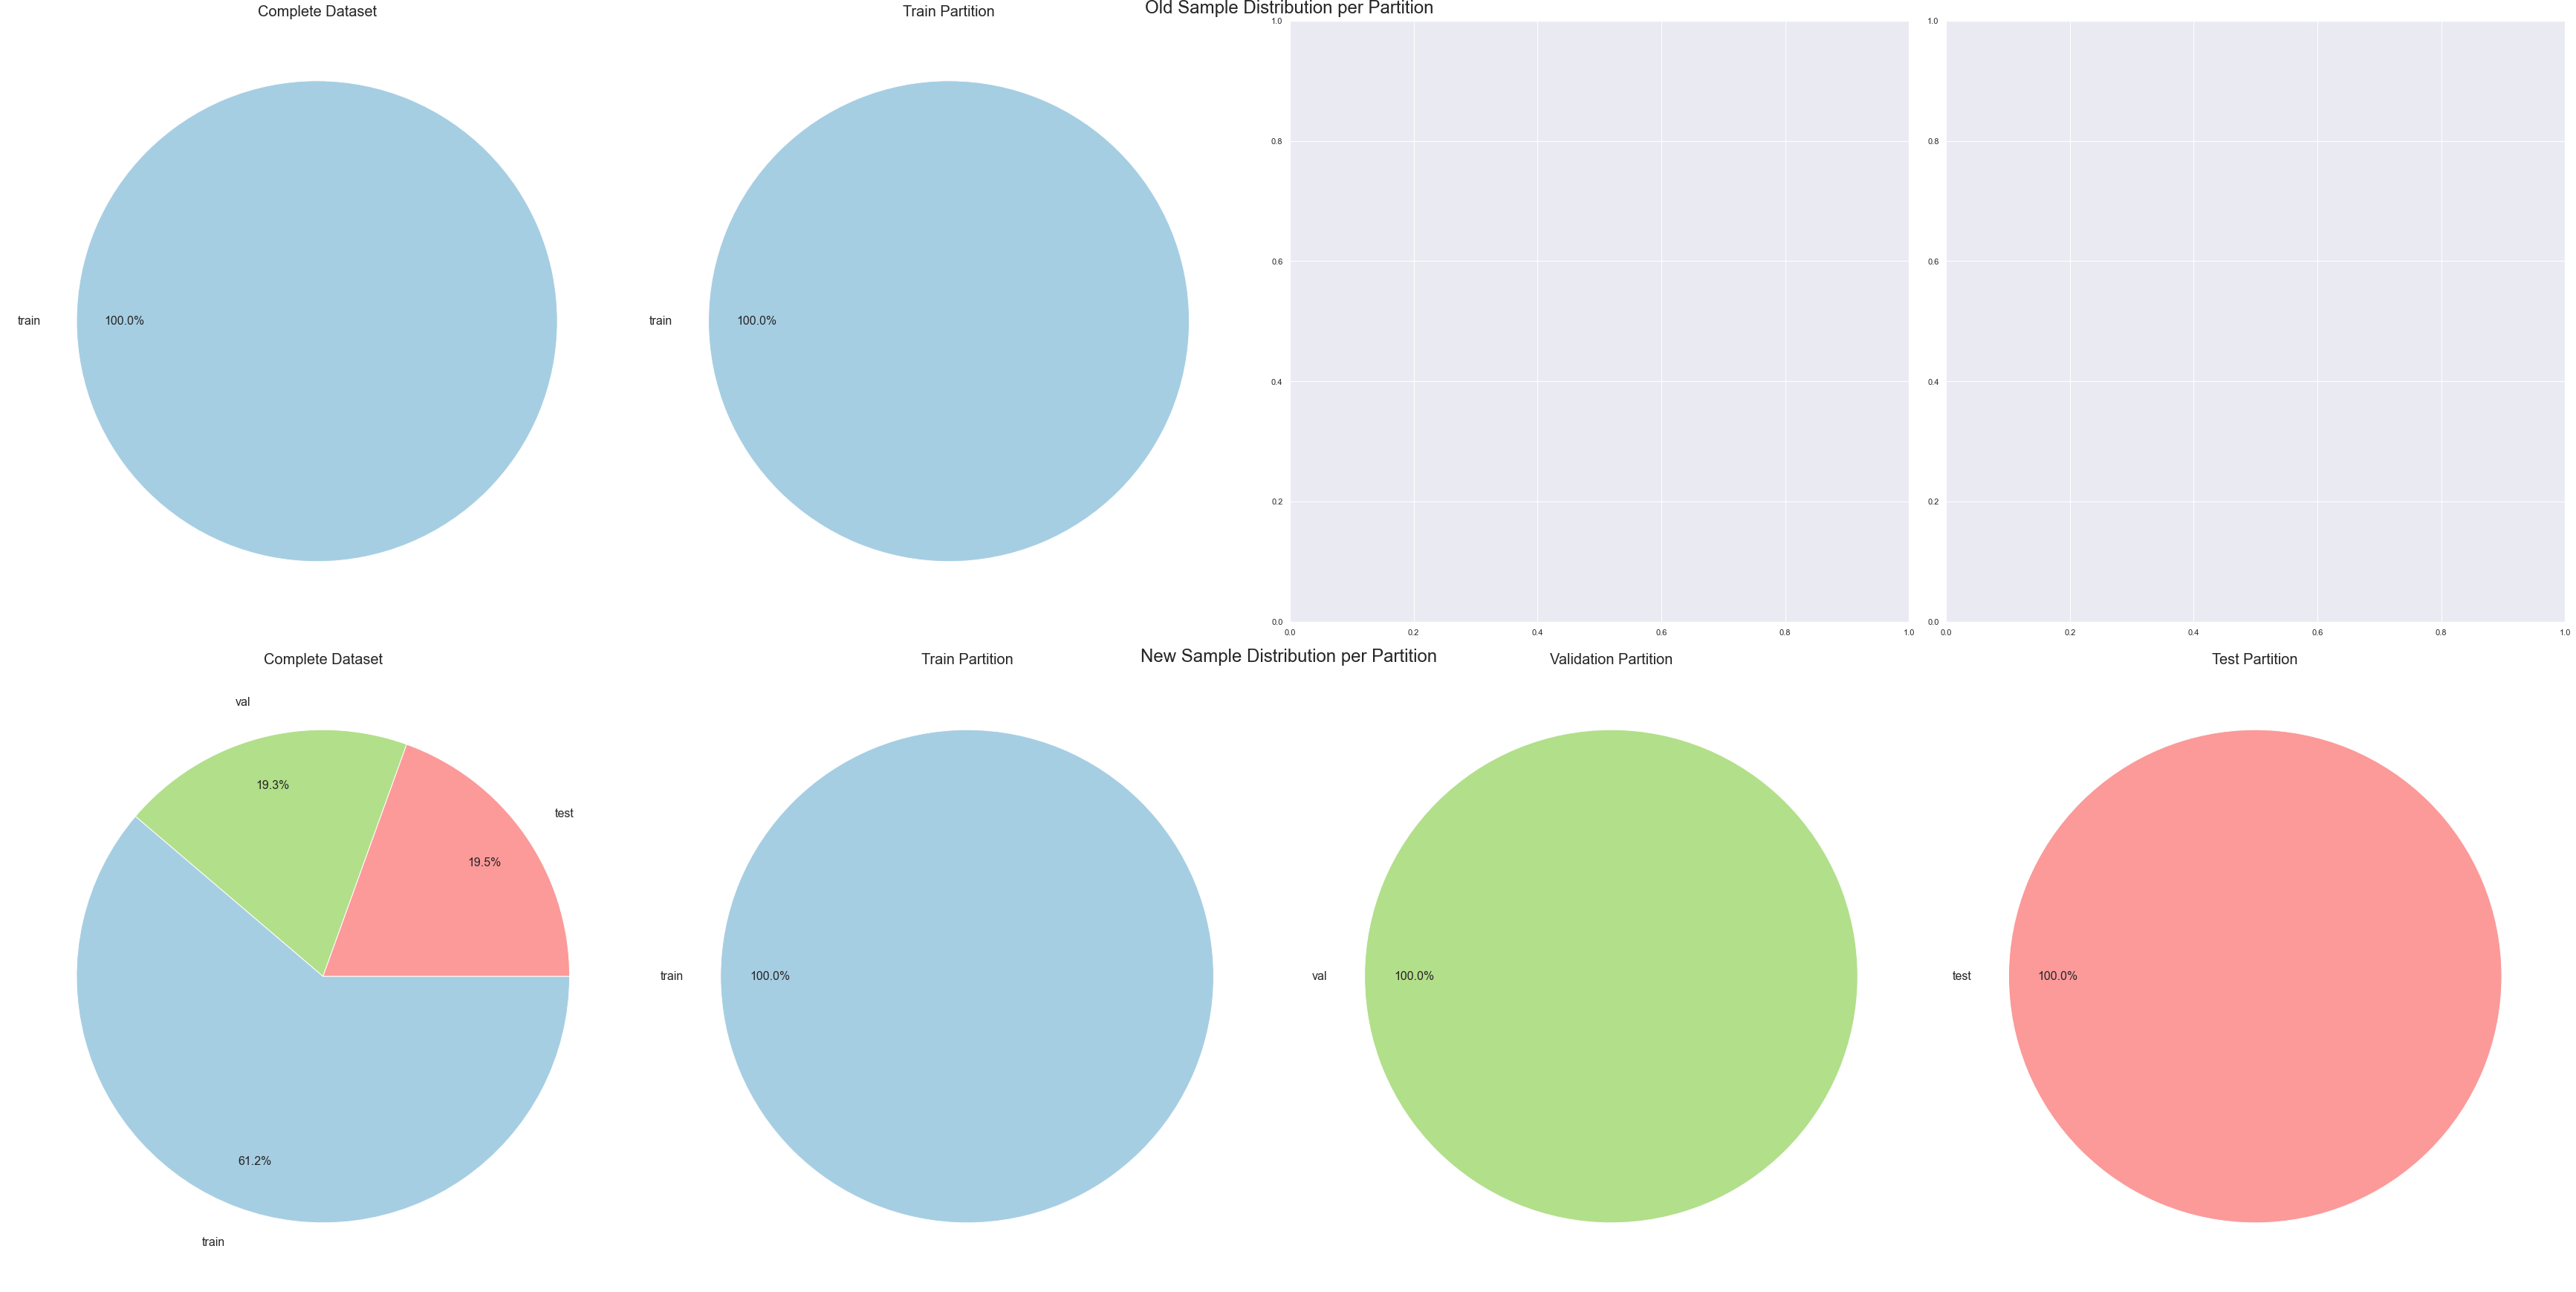

In [32]:
plot.column_as_pies( samples_df, new_samples_df, "partition", dataset_name, figsize = (48, 24), resplit = True )

In [33]:
plot.column_as_table( samples_df, new_samples_df, "partition", dataset_name, bin_flag = False, resplit = True )

,Dataset,Train,Val,Test
Values,,,,
train,45912,45912,0,0
test,0,0,0,0
val,0,0,0,0
SUM,45912,45912,0,0
,Dataset,Train,Val,Test
Values,,,,
train,28116,28116,0,0
test,8949,0,0,8949
val,8847,0,8847,0


## Slice Selection

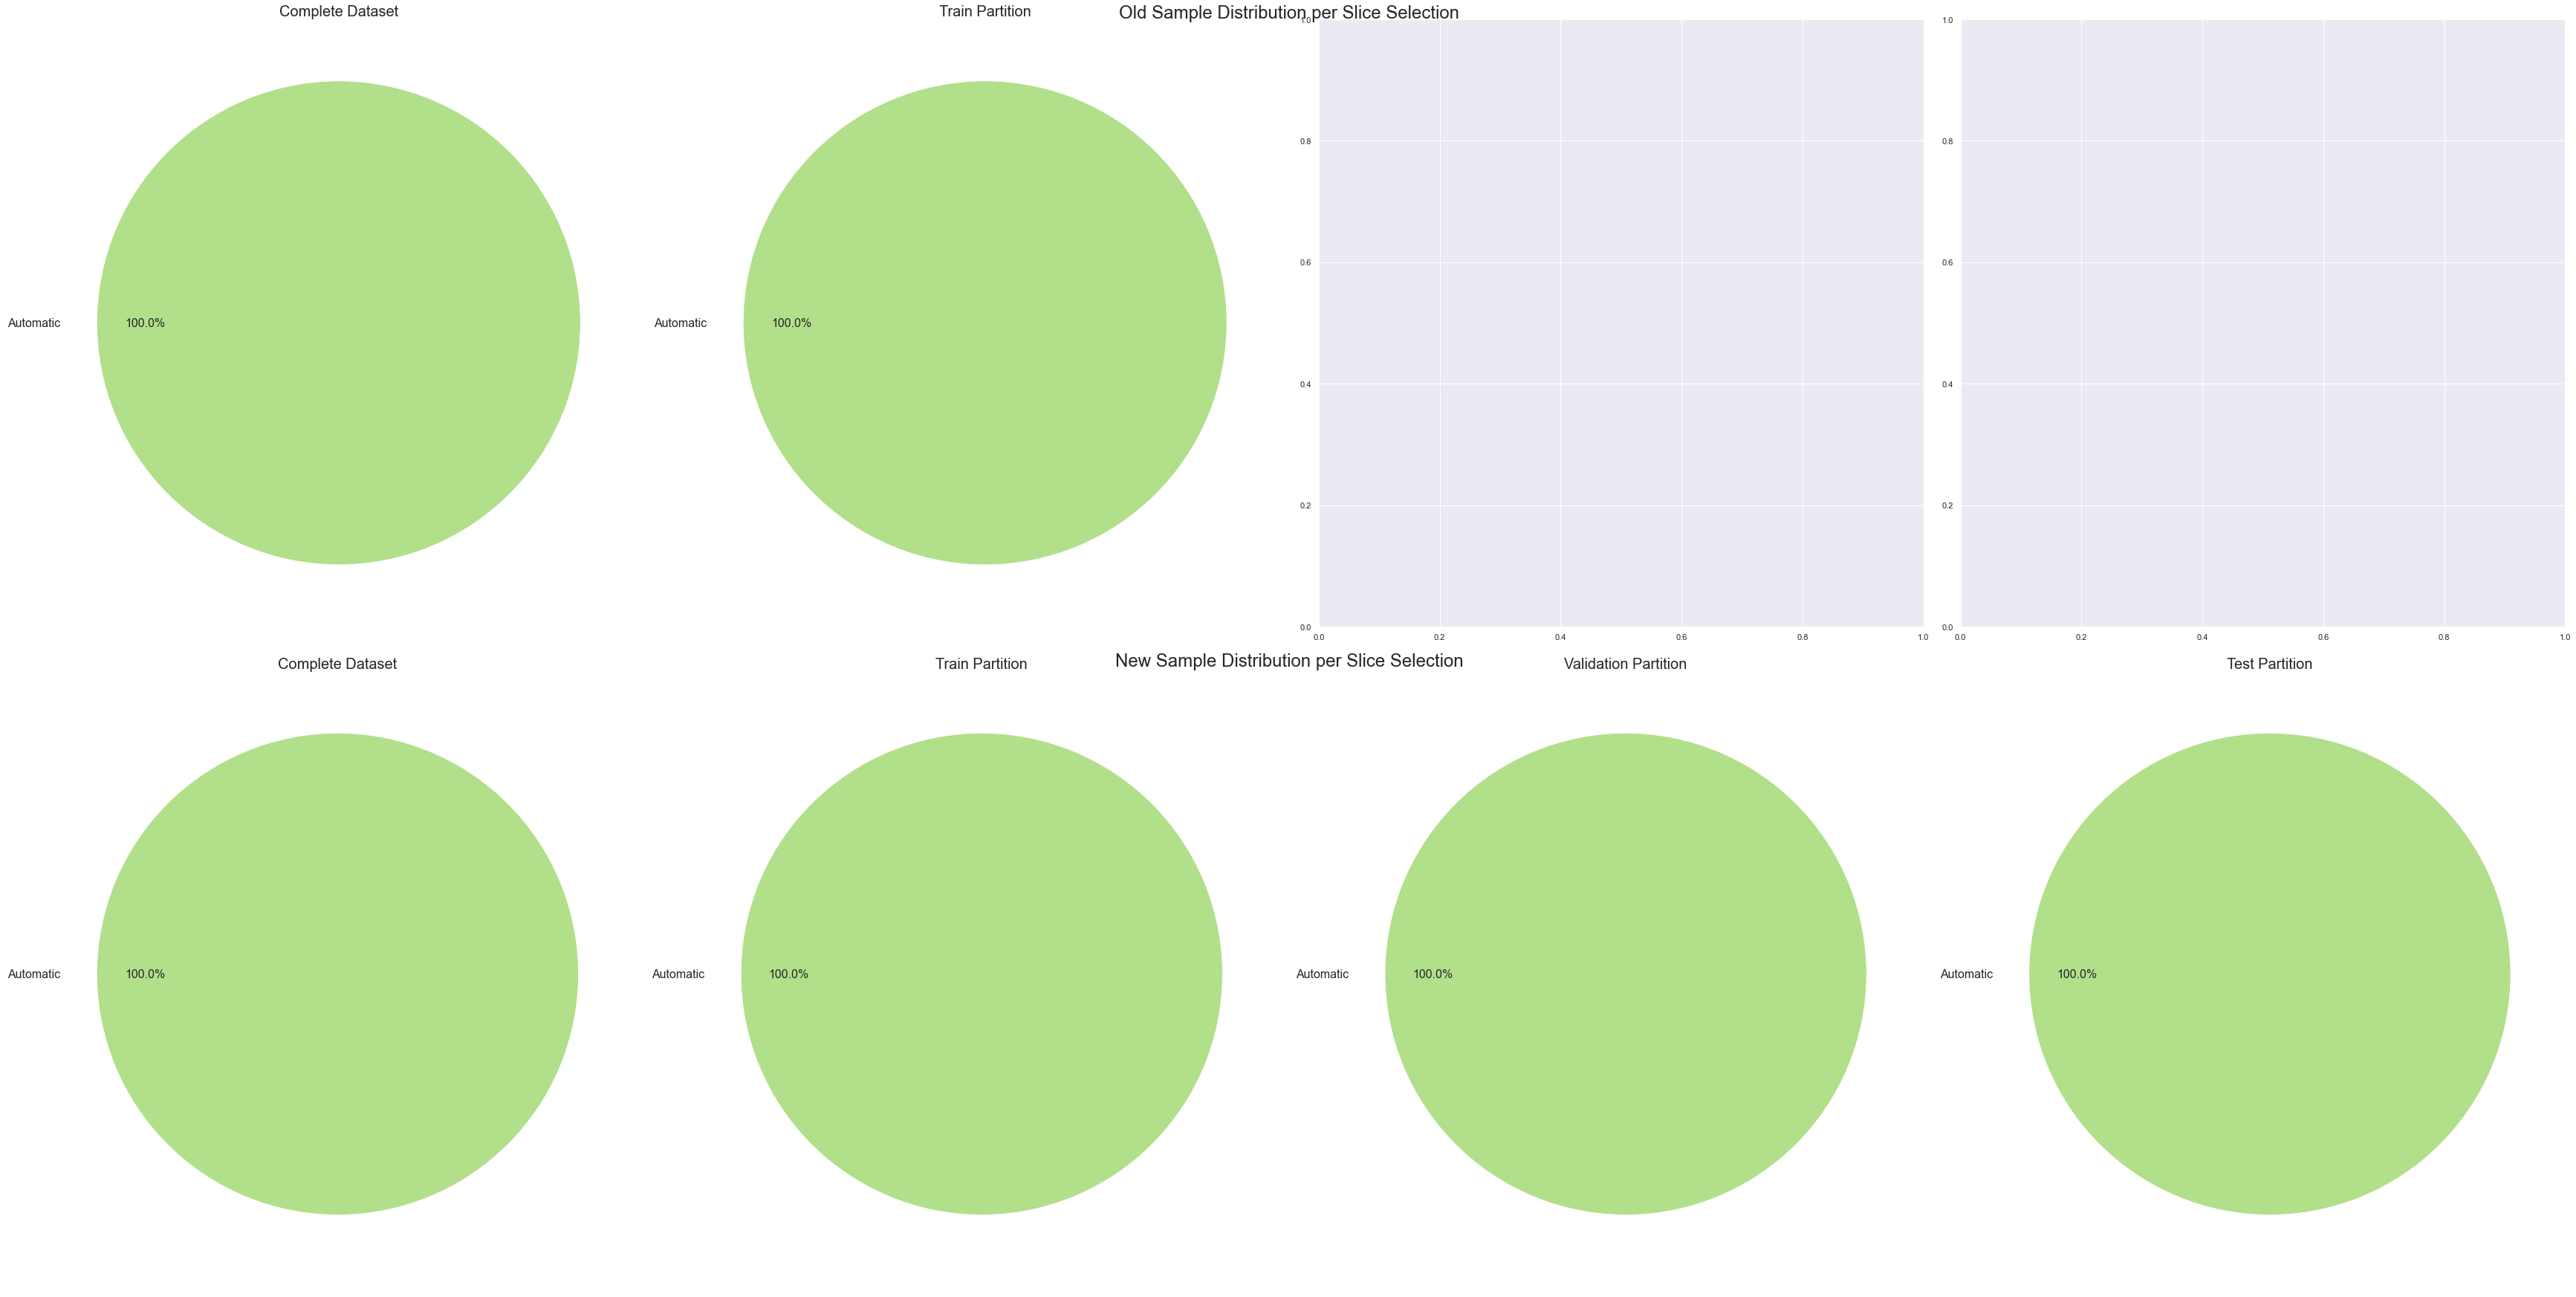

In [34]:
plot.column_as_pies( samples_df, new_samples_df, "slice_selection", dataset_name, figsize = (48, 24), resplit = True )

In [35]:
plot.column_as_table( samples_df, new_samples_df, "slice_selection", dataset_name, bin_flag = False, resplit = True )

,Dataset,Train,Val,Test
Values,,,,
Automatic,45912,45912,0,0
Expert,0,0,0,0
N/A,0,0,0,0
Non-expert,0,0,0,0
SUM,45912,45912,0,0
,Dataset,Train,Val,Test
Values,,,,
Automatic,45912,28116,8847,8949
SUM,45912,28116,8847,8949


# Registering Changes

In [36]:
# Path to save new metadata csv
csv_export_path = os.path.join( data_dir, "new_split_metadata.csv" )

updated_df = split.update_metadata_csv( csv_export_path, new_samples_df, dataset_name, save_bool = True )
print( len(updated_df), len(new_samples_df) )
updated_df.head()

177381 45912


,filename,patient_id,source,class,country,sex,age,partition,slice_selection,x_min,y_min,x_max,y_max,verified_finding,view,modality
0,NCP_96_1328_0032.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,9,94,512,405,Yes,Axial,CT
1,NCP_96_1328_0035.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,106,512,405,Yes,Axial,CT
2,NCP_96_1328_0036.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,105,512,406,Yes,Axial,CT
3,NCP_96_1328_0037.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,104,512,406,Yes,Axial,CT
4,NCP_96_1328_0038.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,103,512,406,Yes,Axial,CT
